In [5]:
import pandas as pd
import Ridetrack_Analysis
RideTrackAnalyzer = Ridetrack_Analysis.RideTrackAnalyzer()

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:11<00:00,  1.69it/s]


根據 Silhouette Score，前 10 個建議的分群數量分別為 [11 13 12 17 14 18 19 20  3  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [ 4 12 13 15 16 14 17 18 19 20]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [14 13 12  5 10  9 11  7  6  8]
根據 Distortion，前 10 個建議的分群數量分別為 [20 19 18 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 {12, 13, 14}
Execution time: 0.0 hours 0.0 minutes 11.505234718322754 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.591076             14588.103764              0.556814   
 3           0.527216             17067.159925              0.610335   
 4           0.475753             17307.325430              0.688090   
 5           0.437263             16493.426850              0.768623   
 6           0.433930             16101.040161              0.862877   
 7           0.412265             16604.120236              0.849548   
 8           0.401229             16713.746352              0.868920   
 9           0.429485             16909.525998              0.804574   
 10          0.447839             17169.867606              0.794392   
 11          0.477438             17174.494824              0.824022   
 12          0.482693             18796.584204              0.748200   
 13          0.482381             19547.358252              0.727238   
 14          0.488009             20250.519660              0.70

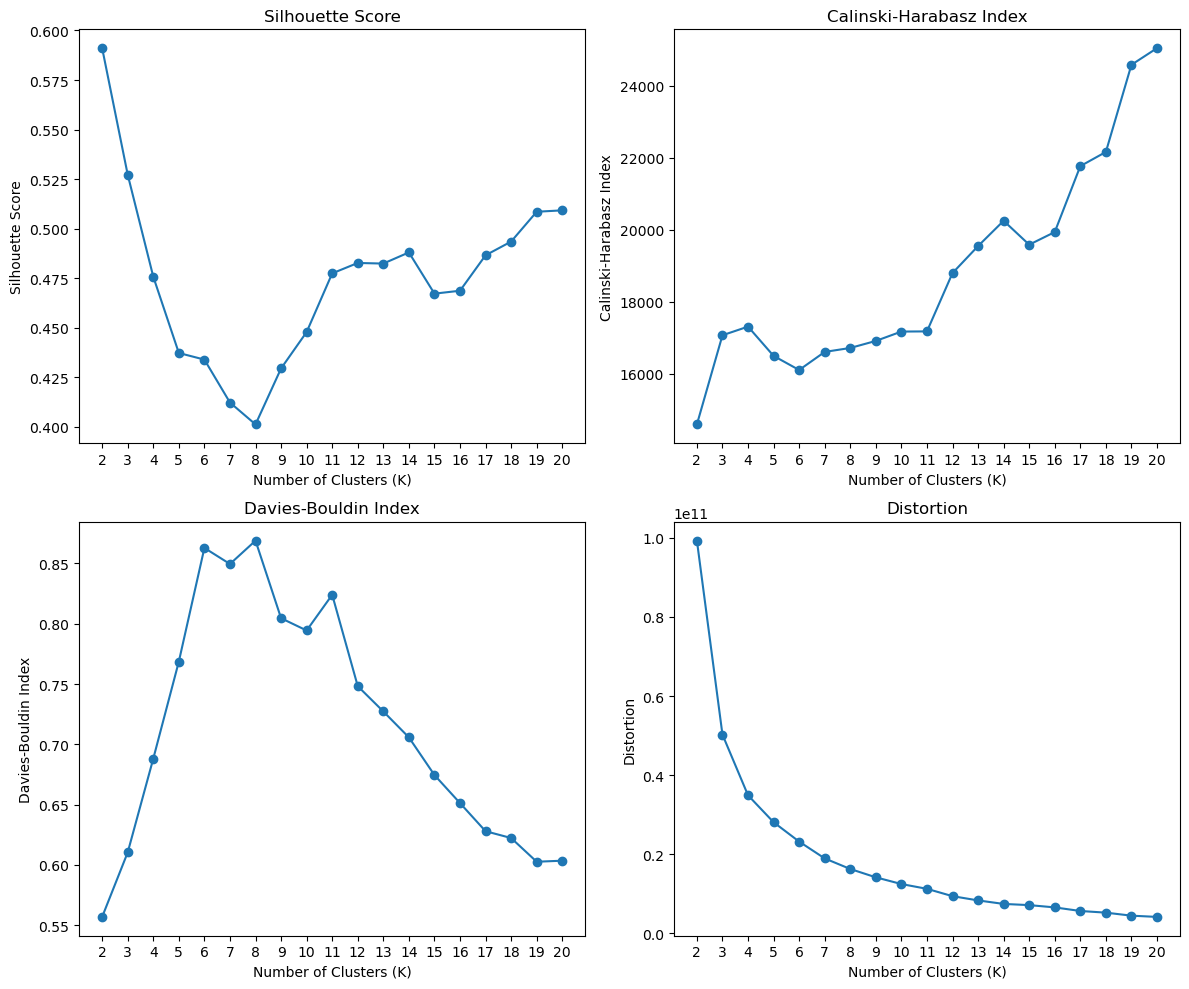

In [17]:
#case 1

DataSet = pd.read_csv('Baseline_Downsample_F6.csv')
RideTrackAnalyzer.determine_optimal_clusters(DataSet, 20, None)

In [10]:
#case 1

DataSet = pd.read_csv('Baseline_Downsample_F6.csv')
    
feature = ['X-axis Angular Velocity',
       'Y-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration',
       'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

RideTrackAnalyzer.predict_cluster(DataSet, feature, 'case1_20230715_model_220148.pkl', 'Baseline_Downsample_F6_11_Cluster.csv')
    
Train_Data = pd.read_csv('Baseline_Downsample_F6_11_Cluster.csv')
Test_Data = pd.read_csv('Baseline_Downsample_F6_11_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.1959998607635498 seconds
Execution time: 0.0 hours 0.0 minutes 5.353460073471069 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:29<00:00, 189.60it/s]


預測所花費時間：0小時0分鐘29秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  67.022539    19.298246   32.751092   46.25  35.593220   
1  Filter_Predict  82.087782    24.561404   35.807860   52.50  41.525424   

   Two-Stage Left  Accuracy (Total)  
0       61.748634         54.499043  
1       69.398907         65.092534  
|    | RideTrack      |    Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|--------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 67.0225 |       19.2982 |      32.7511 |    46.25 |     35.5932 |          61.7486 |            54.499  |
|  1 | Filter_Predict | 82.0878 |       24.5614 |      35.8079 |    52.5  |     41.5254 |          69.3989 |            65.0925 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,28,32,7,19,10,18,24.561404
1,Idle,0,692,0,50,101,0,82.087782
2,Turn Left,39,9,49,10,9,2,41.525424
3,Turn Right,39,67,13,82,13,15,35.807860
4,Two-Stage Left,0,39,11,6,127,0,69.398907
5,U-turn,0,8,0,13,17,42,52.500000


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:11<00:00,  1.68it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [10 11  9  8  7  6  5  4  3  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11 12 13 14 16 15 17 18 19 20]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [11 13 12 14 17 15 16 18 19 20]
根據 Distortion，前 10 個建議的分群數量分別為 [20 19 18 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 {11}
Execution time: 0.0 hours 0.0 minutes 11.490962743759155 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.625868             16467.020084              0.500000   
 3           0.589907             22050.321120              0.500000   
 4           0.568843             26371.635569              0.500001   
 5           0.558989             31848.232479              0.500001   
 6           0.550350             37044.283164              0.500002   
 7           0.544889             37946.729375              0.500002   
 8           0.541813             48910.436491              0.500003   
 9           0.539147             54399.270619              0.500003   
 10          0.533640             57196.244538              0.500003   
 11          0.533951             64645.529899              0.500004   
 12          0.533542             70773.064693              0.500005   
 13          0.531373             73505.469511              0.500004   
 14          0.530085             79883.148659              0.50

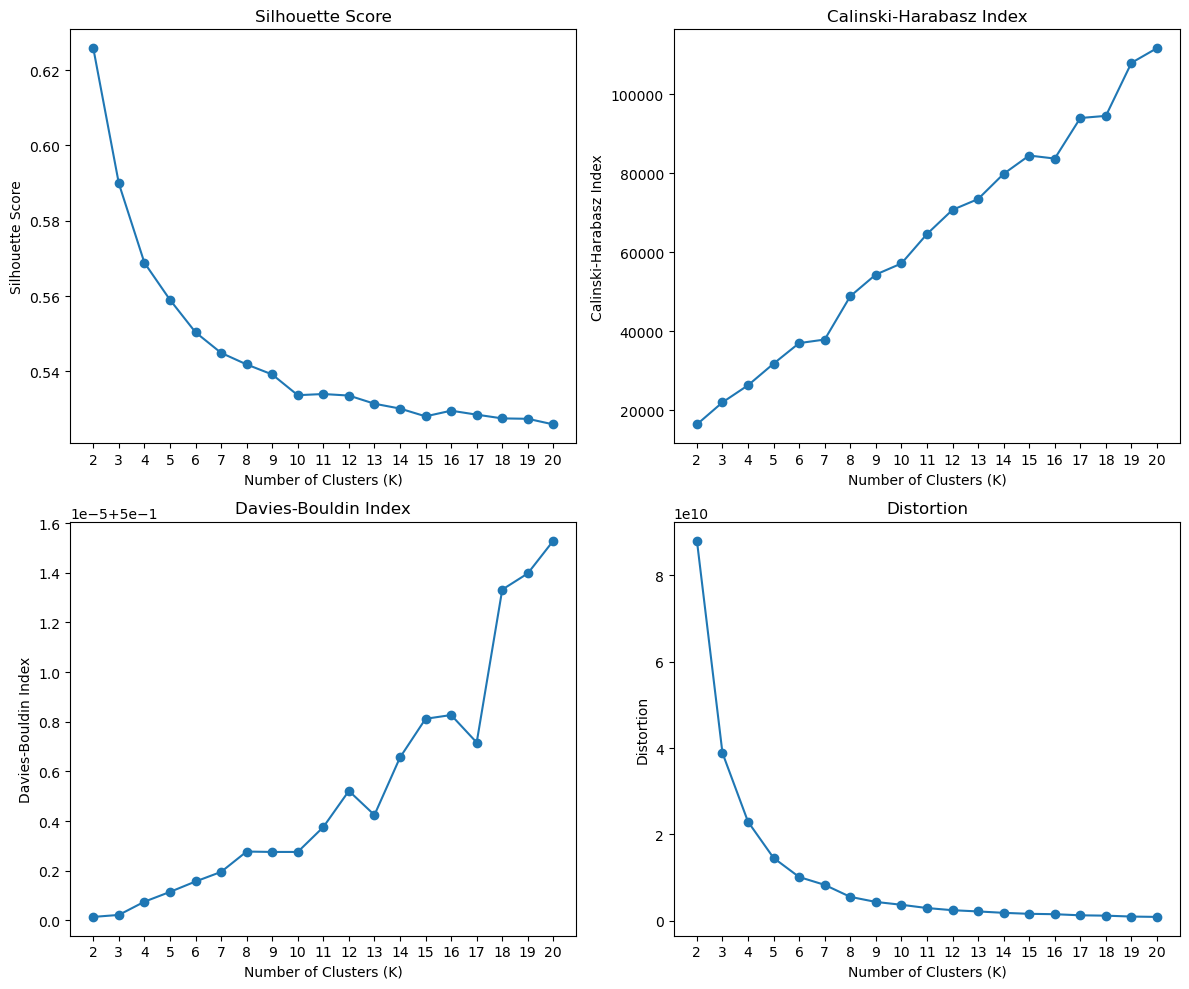

In [18]:
#case 2
DataSet = pd.read_csv('Normalization_Downsample_F6.csv')
RideTrackAnalyzer.determine_optimal_clusters(DataSet, 20, None)

In [11]:
#case 2

DataSet = pd.read_csv('Normalization_Downsample_F6.csv')
    
feature = ['X-axis Angular Velocity',
       'Y-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration',
       'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

RideTrackAnalyzer.predict_cluster(DataSet, feature, 'case2_20230715_model_221139.pkl', 'Normalization_Downsample_F6_8_Cluster.csv')
    
Train_Data = pd.read_csv('Normalization_Downsample_F6_8_Cluster.csv')
Test_Data = pd.read_csv('Normalization_Downsample_F6_8_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 8, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.2869997024536133 seconds
Execution time: 0.0 hours 0.0 minutes 5.17195725440979 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:29<00:00, 186.90it/s]


預測所花費時間：0小時0分鐘29秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  87.188612    16.666667   40.611354    50.0  47.457627   
1  Filter_Predict  93.831554    19.298246   39.301310    67.5  60.169492   

   Two-Stage Left  Accuracy (Total)  
0       56.830601         66.815571  
1       67.213115         73.452457  
|    | RideTrack      |    Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|--------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 87.1886 |       16.6667 |      40.6114 |     50   |     47.4576 |          56.8306 |            66.8156 |
|  1 | Filter_Predict | 93.8316 |       19.2982 |      39.3013 |     67.5 |     60.1695 |          67.2131 |            73.4525 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,22,56,0,16,9,11,19.298246
1,Idle,0,791,0,13,39,0,93.831554
2,Turn Left,13,0,71,19,4,11,60.169492
3,Turn Right,18,36,51,90,19,15,39.301310
4,Two-Stage Left,4,49,0,7,123,0,67.213115
5,U-turn,0,11,0,0,15,54,67.500000


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:11<00:00,  1.66it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [10 11  9  8  7  6  5  4  3  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11 12 13 14 16 15 17 18 19 20]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [11 13 12 14 17 15 16 18 19 20]
根據 Distortion，前 10 個建議的分群數量分別為 [20 19 18 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 {11}
Execution time: 0.0 hours 0.0 minutes 11.623986005783081 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.625868             16467.020081              0.500000   
 3           0.589907             22050.321111              0.500000   
 4           0.568843             26371.635550              0.500001   
 5           0.558989             31848.232444              0.500001   
 6           0.550350             37044.283106              0.500002   
 7           0.544889             37946.729302              0.500002   
 8           0.541813             48910.436350              0.500003   
 9           0.539147             54399.270420              0.500003   
 10          0.533640             57196.244293              0.500003   
 11          0.533951             64645.529555              0.500004   
 12          0.533542             70773.064236              0.500005   
 13          0.531373             73505.468981              0.500004   
 14          0.530085             79883.147967              0.50

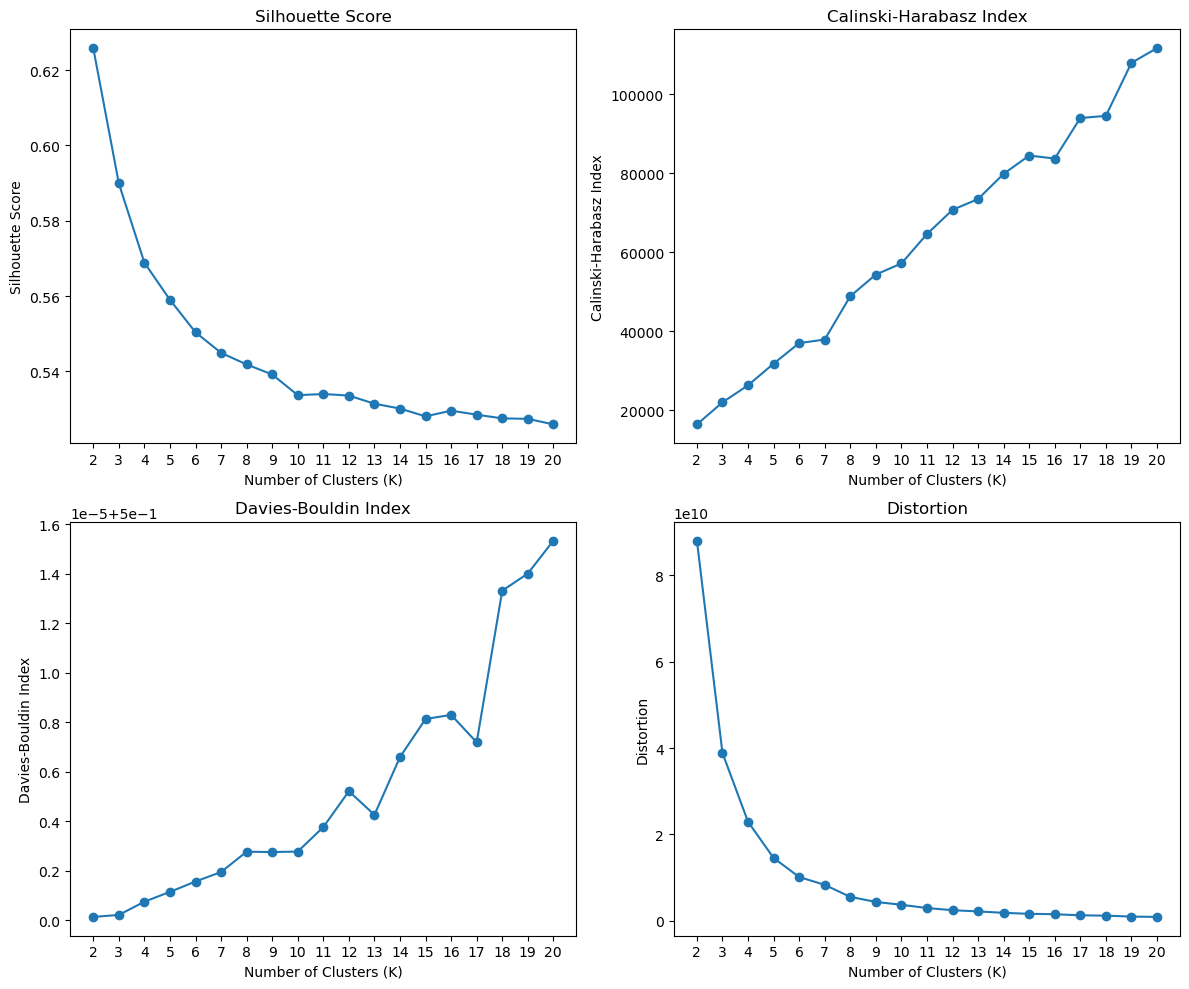

In [19]:
#case 3
DataSet = pd.read_csv('Correction_Normalization_Downsample_F6.csv')
RideTrackAnalyzer.determine_optimal_clusters(DataSet, 20, None)

In [12]:
#case 3

DataSet = pd.read_csv('Correction_Normalization_Downsample_F6.csv')
    
feature = ['X-axis Angular Velocity',
       'Y-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration',
       'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

RideTrackAnalyzer.predict_cluster(DataSet, feature, 'case3_20230715_model_222229.pkl', 'Correction_Normalization_Downsample_F6_9_Cluster.csv')
    
Train_Data = pd.read_csv('Correction_Normalization_Downsample_F6_9_Cluster.csv')
Test_Data = pd.read_csv('Correction_Normalization_Downsample_F6_9_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 9, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.34438610076904297 seconds
Execution time: 0.0 hours 0.0 minutes 5.0219995975494385 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:30<00:00, 183.83it/s]


預測所花費時間：0小時0分鐘30秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  86.120996    28.070175   45.414847   46.25  32.203390   
1  Filter_Predict  90.154211    35.087719   51.528384   47.50  30.508475   

   Two-Stage Left  Accuracy (Total)  
0       62.841530         67.134652  
1       79.781421         72.622846  
|    | RideTrack      |    Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|--------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 86.121  |       28.0702 |      45.4148 |    46.25 |     32.2034 |          62.8415 |            67.1347 |
|  1 | Filter_Predict | 90.1542 |       35.0877 |      51.5284 |    47.5  |     30.5085 |          79.7814 |            72.6228 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,40,51,0,18,5,0,35.087719
1,Idle,0,760,0,7,76,0,90.154211
2,Turn Left,25,1,36,37,13,6,30.508475
3,Turn Right,18,38,29,118,26,0,51.528384
4,Two-Stage Left,6,31,0,0,146,0,79.781421
5,U-turn,0,10,0,0,32,38,47.500000


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:11<00:00,  1.66it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [10 11  9  8  7  6  5  4  3  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11 12 13 14 16 15 17 18 19 20]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [11 13 12 14 17 15 16 18 19 20]
根據 Distortion，前 10 個建議的分群數量分別為 [20 19 18 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 {11}
Execution time: 0.0 hours 0.0 minutes 11.576590061187744 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.625868             16467.020100              0.500000   
 3           0.589907             22050.321168              0.500000   
 4           0.568843             26371.635667              0.500001   
 5           0.558989             31848.232667              0.500001   
 6           0.550350             37044.283478              0.500002   
 7           0.544889             37946.729768              0.500002   
 8           0.541813             48910.437245              0.500003   
 9           0.539147             54399.271679              0.500003   
 10          0.533640             57196.245865              0.500003   
 11          0.533951             64645.531781              0.500004   
 12          0.533542             70773.067186              0.500005   
 13          0.531373             73505.472445              0.500004   
 14          0.530085             79883.152389              0.50

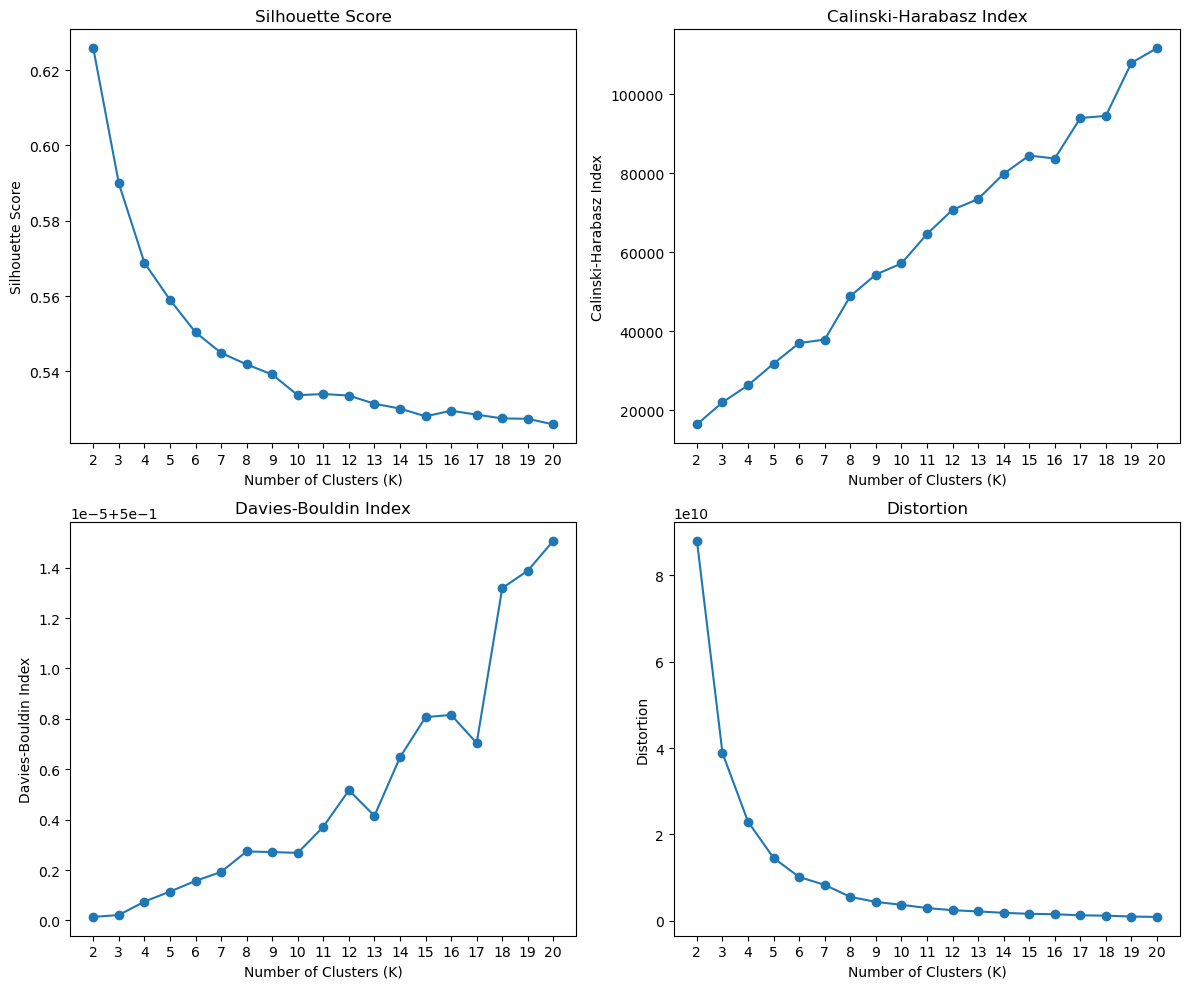

In [20]:
#case 4
DataSet = pd.read_csv('Kalman_Normalization_Downsample_F6.csv')
RideTrackAnalyzer.determine_optimal_clusters(DataSet, 20, None)

In [14]:
#case 4

DataSet = pd.read_csv('Kalman_Normalization_Downsample_F6.csv')
    
feature = ['X-axis Angular Velocity',
       'Y-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration',
       'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

RideTrackAnalyzer.predict_cluster(DataSet, feature, 'case4_20230715_model_222837.pkl', 'Kalman_Normalization_Downsample_F6_10_Cluster.csv')
    
Train_Data = pd.read_csv('Kalman_Normalization_Downsample_F6_10_Cluster.csv')
Test_Data = pd.read_csv('Kalman_Normalization_Downsample_F6_10_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 10, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.27496838569641113 seconds
Execution time: 0.0 hours 0.0 minutes 4.613030433654785 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:28<00:00, 190.36it/s]


預測所花費時間：0小時0分鐘29秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  98.81376    61.403509   55.458515    80.0  78.813559   
1  Filter_Predict  98.81376    69.298246   64.192140    80.0  73.728814   

   Two-Stage Left  Accuracy (Total)  
0       71.584699         84.109764  
1       80.874317         86.662412  
|    | RideTrack      |    Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|--------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 98.8138 |       61.4035 |      55.4585 |       80 |     78.8136 |          71.5847 |            84.1098 |
|  1 | Filter_Predict | 98.8138 |       69.2982 |      64.1921 |       80 |     73.7288 |          80.8743 |            86.6624 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Pre

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,79,19,8,0,5,3,69.298246
1,Idle,0,833,0,0,10,0,98.813760
2,Turn Left,1,0,87,4,0,26,73.728814
3,Turn Right,41,4,36,147,1,0,64.192140
4,Two-Stage Left,16,14,0,5,148,0,80.874317
5,U-turn,0,12,0,4,0,64,80.000000


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:11<00:00,  1.67it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [10 11  9  8  7  6  5  4  3  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11 12 13 14 16 15 17 18 19 20]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [11 13 12 14 17 15 16 18 19 20]
根據 Distortion，前 10 個建議的分群數量分別為 [20 19 18 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 {11}
Execution time: 0.0 hours 0.0 minutes 11.51720380783081 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.625868             16467.020096              0.500000   
 3           0.589907             22050.321157              0.500000   
 4           0.568843             26371.635643              0.500001   
 5           0.558989             31848.232622              0.500001   
 6           0.550350             37044.283403              0.500002   
 7           0.544889             37946.729673              0.500002   
 8           0.541813             48910.437065              0.500003   
 9           0.539147             54399.271424              0.500003   
 10          0.533640             57196.245556              0.500003   
 11          0.533951             64645.531352              0.500004   
 12          0.533542             70773.066614              0.500005   
 13          0.531373             73505.471782              0.500004   
 14          0.530085             79883.151523              0.50

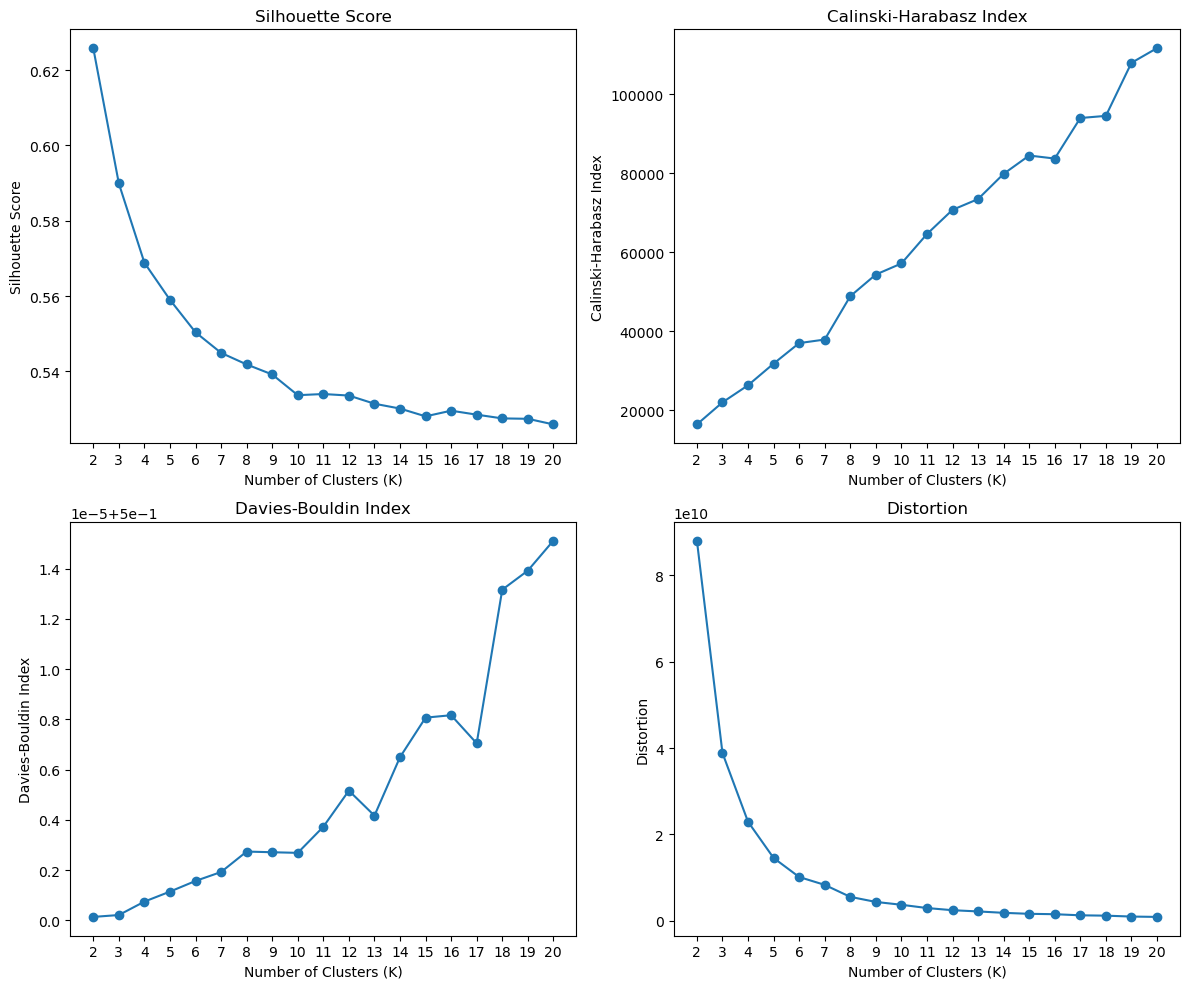

In [21]:
#case 5
DataSet = pd.read_csv('Correction_Kalman_Normalization_Downsample_F6.csv')
RideTrackAnalyzer.determine_optimal_clusters(DataSet, 20, None)

In [15]:
#case 5

DataSet = pd.read_csv('Correction_Kalman_Normalization_Downsample_F6.csv')
    
feature = ['X-axis Angular Velocity',
       'Y-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration',
       'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

RideTrackAnalyzer.predict_cluster(DataSet, feature, 'case5_20230715_model_223826.pkl', 'Correction_Kalman_Normalization_Downsample_F6_10_Cluster.csv')
    
Train_Data = pd.read_csv('Correction_Kalman_Normalization_Downsample_F6_10_Cluster.csv')
Test_Data = pd.read_csv('Correction_Kalman_Normalization_Downsample_F6_10_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 10, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.2859671115875244 seconds
Execution time: 0.0 hours 0.0 minutes 4.308678388595581 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:30<00:00, 182.90it/s]


預測所花費時間：0小時0分鐘30秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  96.678529    50.877193   50.655022   83.75  60.169492   
1  Filter_Predict  98.932384    59.649123   58.078603   86.25  56.779661   

   Two-Stage Left  Accuracy (Total)  
0       76.502732         80.855137  
1       85.245902         84.684110  
|    | RideTrack      |    Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|--------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 96.6785 |       50.8772 |      50.655  |    83.75 |     60.1695 |          76.5027 |            80.8551 |
|  1 | Filter_Predict | 98.9324 |       59.6491 |      58.0786 |    86.25 |     56.7797 |          85.2459 |            84.6841 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,68,2,12,5,16,11,59.649123
1,Idle,0,834,0,0,9,0,98.932384
2,Turn Left,30,1,67,4,9,7,56.779661
3,Turn Right,4,43,37,133,12,0,58.078603
4,Two-Stage Left,0,9,0,18,156,0,85.245902
5,U-turn,0,7,0,4,0,69,86.250000


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:11<00:00,  1.68it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [10 11  9  8  7  6  5  4  3  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11 12 13 14 16 15 17 18 19 20]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [11 13 12 14 17 15 16 18 19 20]
根據 Distortion，前 10 個建議的分群數量分別為 [20 19 18 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 {11}
Execution time: 0.0 hours 0.0 minutes 11.488061666488647 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.625868             16467.020130              0.500000   
 3           0.589907             22050.321262              0.500000   
 4           0.568843             26371.635857              0.500001   
 5           0.558989             31848.233026              0.500001   
 6           0.550350             37044.284079              0.500002   
 7           0.544889             37946.730520              0.500002   
 8           0.541813             48910.438692              0.500003   
 9           0.539147             54399.273717              0.500003   
 10          0.533640             57196.248385              0.500003   
 11          0.533951             64645.535350              0.500004   
 12          0.533542             70773.071883              0.500005   
 13          0.531374             73505.477940              0.500004   
 14          0.530086             79883.159457              0.50

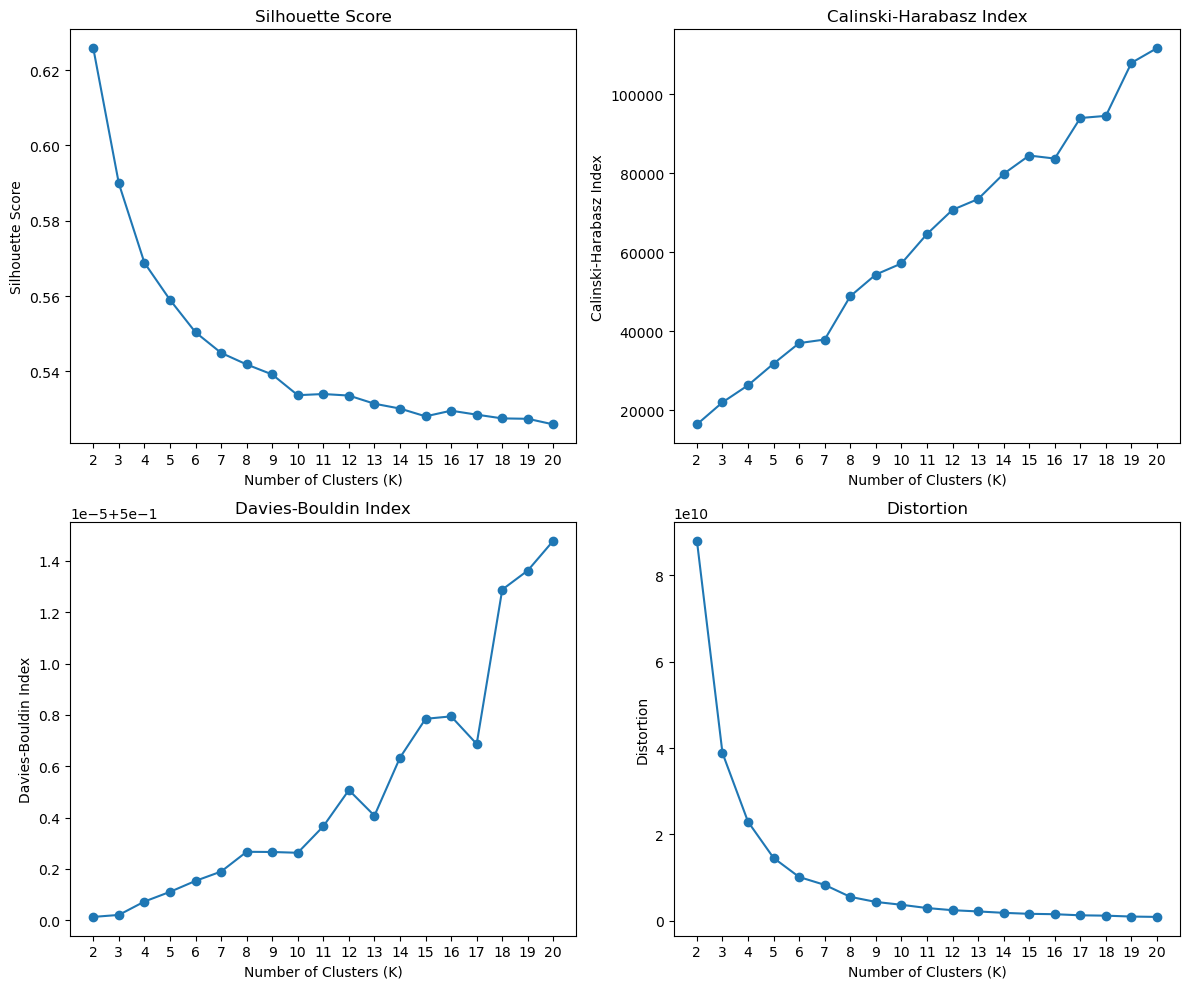

In [22]:
#case 6
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
RideTrackAnalyzer.determine_optimal_clusters(DataSet, 20, None)

In [16]:
#case 6

DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
feature = ['X-axis Angular Velocity',
       'Y-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration',
       'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

RideTrackAnalyzer.predict_cluster(DataSet, feature, 'case6_20230715_model_224538.pkl', 'Correction_Normalization_Kalman_Downsample_F6_10_Cluster.csv')
    
Train_Data = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6_10_Cluster.csv')
Test_Data = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6_10_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 10, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.4420139789581299 seconds
Execution time: 0.0 hours 0.0 minutes 4.862054824829102 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:29<00:00, 185.69it/s]


預測所花費時間：0小時0分鐘29秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.762752    54.385965   66.375546   81.25  94.915254   
1  Filter_Predict  99.762752    57.017544   73.799127   81.25  97.457627   

   Two-Stage Left  Accuracy (Total)  
0       66.120219         86.343331  
1       78.142077         89.215061  
|    | RideTrack      |    Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|--------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 99.7628 |       54.386  |      66.3755 |    81.25 |     94.9153 |          66.1202 |            86.3433 |
|  1 | Filter_Predict | 99.7628 |       57.0175 |      73.7991 |    81.25 |     97.4576 |          78.1421 |            89.2151 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,65,28,0,0,21,0,57.017544
1,Idle,0,841,0,0,2,0,99.762752
2,Turn Left,0,0,115,3,0,0,97.457627
3,Turn Right,26,12,0,169,15,7,73.799127
4,Two-Stage Left,8,17,0,15,143,0,78.142077
5,U-turn,0,11,0,4,0,65,81.250000


In [ ]:
## 消融 2 

In [6]:
# 第二階段消融實驗 以case 6為主

In [33]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6_10_Cluster.csv')

feature = ['X-axis Angular Velocity',
       'Y-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration',
       'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

RideTrackAnalyzer.apply_pca(DataSet[feature], None, 'Case6_PCA.pkl')
print(RideTrackAnalyzer.get_feature_weights(DataSet[feature], 'Case6_PCA.pkl').to_markdown())

適合降至6維度
Execution time: 0.0 hours 0.0 minutes 0.008999824523925781 seconds
Execution time: 0.0 hours 0.0 minutes 0.0069980621337890625 seconds
|    | Feature                 |    Weight |
|---:|:------------------------|----------:|
|  2 | Z-axis Angular Velocity | 0.366453  |
|  8 | Z-axis Angle            | 0.351774  |
|  0 | X-axis Angular Velocity | 0.345129  |
|  7 | Y-axis Angle            | 0.329057  |
|  3 | X-axis Acceleration     | 0.23259   |
|  6 | X-axis Angle            | 0.177267  |
|  4 | Y-axis Acceleration     | 0.150164  |
|  1 | Y-axis Angular Velocity | 0.0639817 |
|  5 | Z-axis Acceleration     | 0.0243168 |


In [ ]:
# 2	Z-axis Angular Velocity	0.366453
# 8	Z-axis Angle	0.351774
# 0	X-axis Angular Velocity	0.345129
# 7	Y-axis Angle	0.329057
# 3	X-axis Acceleration	0.232590
# 6	X-axis Angle	0.177267

In [18]:
df_pca = RideTrackAnalyzer.load_and_transform_with_pca('Case6_PCA.pkl', DataSet[feature])

In [19]:
DF_PCA = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
DF_PCA.to_csv('DF_PCA.csv')

In [22]:
import pandas as pd
import Ridetrack_Analysis
import time
from datetime import datetime
from datetime import timedelta
RideTrackAnalyzer = Ridetrack_Analysis.RideTrackAnalyzer()

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:10<00:00,  1.73it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [10 11  9  8  7  6  5  4  3  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11 12 13 14 16 15 17 18 19 20]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [12 13  8 17 14 15 16 18 19 20]
根據 Distortion，前 10 個建議的分群數量分別為 [20 19 18 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 set()
Execution time: 0.0 hours 0.0 minutes 11.115133047103882 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.625868             16467.021335              0.500000   
 3           0.589907             22050.324807              0.500000   
 4           0.568843             26371.643055              0.500000   
 5           0.558989             31848.246541              0.500001   
 6           0.550351             37044.306619              0.500001   
 7           0.544890             37946.758592              0.500000   
 8           0.541813             48910.492160              0.500001   
 9           0.539148             54399.348732              0.500001   
 10          0.533641             57196.340774              0.500000   
 11          0.533952             64645.664833              0.500001   
 12          0.533543             70773.242116              0.500001   
 13          0.531388             73512.916410              0.500001   
 14          0.530090             79897.463732              0.50

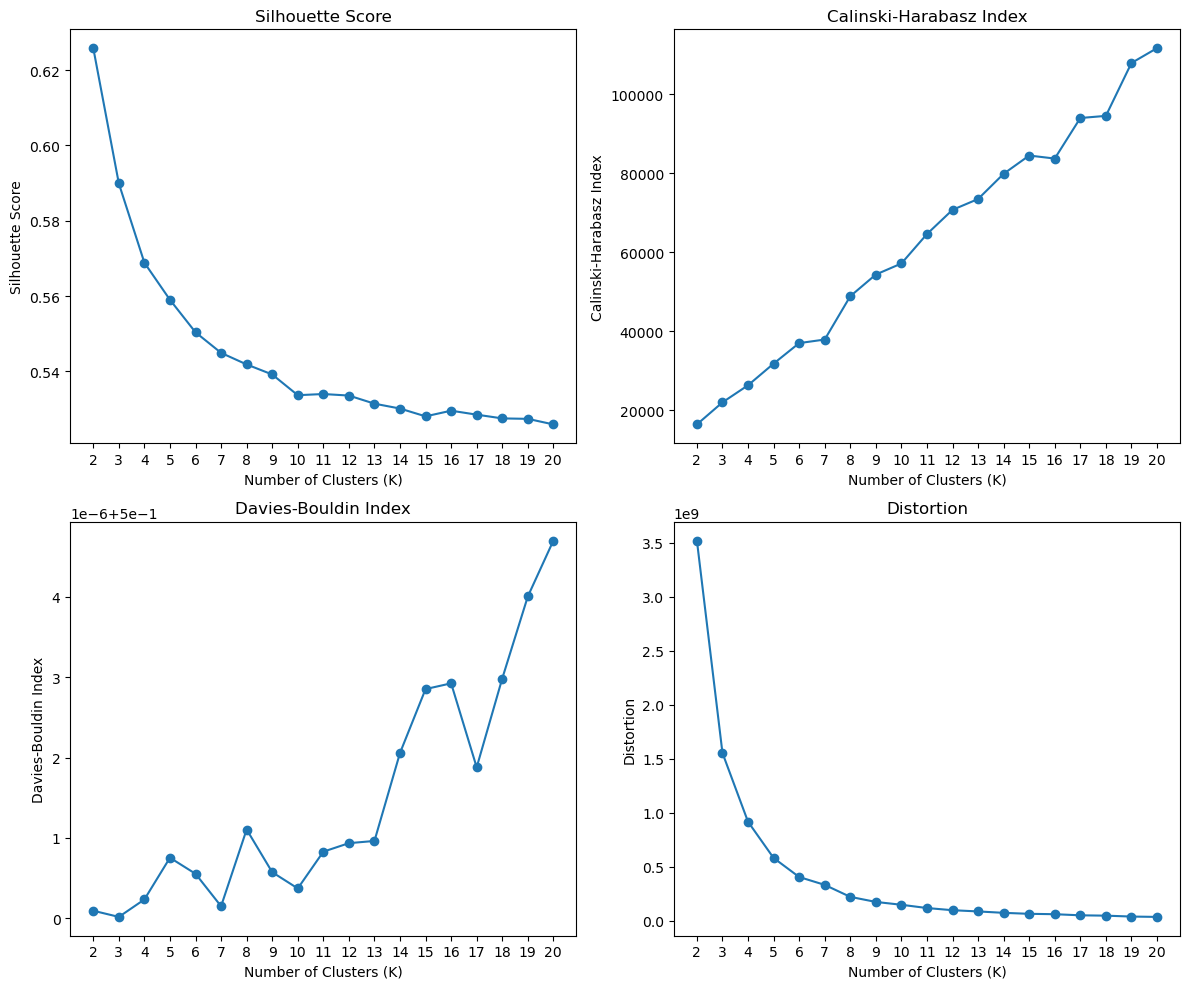

In [20]:
# case2
DataSet = pd.read_csv('DF_PCA.csv')
RideTrackAnalyzer.determine_optimal_clusters(DataSet, 20, None)

In [24]:
#case 2
DF_PCA
for x in range (10):
    
    DataSet = pd.read_csv('DF_PCA.csv')
    
    now = datetime.now()
    date = now.strftime('%Y%m%d')
    now_time = now.strftime('%H%M%S')  # 格式化時間為HHMMSS，包括秒數
    print(now_time)
    model = f"{date}_model_{now_time}.pkl"
    RideTrackAnalyzer.cluster_data(DataSet, DataSet.columns, method="kmeans", n_clusters=11, model_path=model, save_path='DF_PCA_F6_11_Cluster.csv')
    
    Train_Data = pd.read_csv('DF_PCA_F6_11_Cluster.csv')
    Test_Data = pd.read_csv('DF_PCA_F6_11_Cluster.csv')

    Train_Label = pd.read_csv('Train_Label.csv')
    Test_Label = pd.read_csv('Test_Label.csv')

    Train_Data['Action'] = Train_Label['Action']
    Test_Data['Action'] = Test_Label['Action']

    RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
    RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
    RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False)
    
    
    
    


005452
Execution time: 0.0 hours 0.0 minutes 0.28299903869628906 seconds
Execution time: 0.0 hours 0.0 minutes 0.6957535743713379 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:42<00:00, 129.81it/s]


預測所花費時間：0小時0分鐘42秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0   5.084746   
1  Filter_Predict  0.000000    71.929825         0.0     0.0   5.084746   

   Two-Stage Left  Accuracy (Total)  
0             0.0          5.679643  
1             0.0          5.615826  
005536
Execution time: 0.0 hours 0.0 minutes 0.3038339614868164 seconds
Execution time: 0.0 hours 0.0 minutes 0.7675075531005859 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 127.62it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0   5.084746   
1  Filter_Predict  0.000000    71.929825         0.0     0.0   5.084746   

   Two-Stage Left  Accuracy (Total)  
0        1.092896          5.807275  
1        1.092896          5.743459  
005621
Execution time: 0.0 hours 0.0 minutes 0.3079993724822998 seconds
Execution time: 0.0 hours 0.0 minutes 0.703953742980957 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:42<00:00, 129.40it/s]


預測所花費時間：0小時0分鐘42秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0        0.0   
1  Filter_Predict  0.000000    71.929825         0.0     0.0        0.0   

   Two-Stage Left  Accuracy (Total)  
0             0.0          5.296745  
1             0.0          5.232929  
005705
Execution time: 0.0 hours 0.0 minutes 0.31159162521362305 seconds
Execution time: 0.0 hours 0.0 minutes 0.7367875576019287 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 127.76it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0        0.0   
1  Filter_Predict  0.000000    71.929825         0.0     0.0        0.0   

   Two-Stage Left  Accuracy (Total)  
0             0.0          5.296745  
1             0.0          5.232929  
005749
Execution time: 0.0 hours 0.0 minutes 0.30153369903564453 seconds
Execution time: 0.0 hours 0.0 minutes 0.7392528057098389 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:44<00:00, 125.11it/s]


預測所花費時間：0小時0分鐘44秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0  25.423729   
1  Filter_Predict  0.000000    71.929825         0.0     0.0  25.423729   

   Two-Stage Left  Accuracy (Total)  
0             0.0          7.211232  
1             0.0          7.147415  
005834
Execution time: 0.0 hours 0.0 minutes 0.30905675888061523 seconds
Execution time: 0.0 hours 0.0 minutes 0.7968034744262695 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:44<00:00, 125.11it/s]


預測所花費時間：0小時0分鐘44秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    46.491228         0.0     0.0        0.0   
1  Filter_Predict  0.000000    46.491228         0.0     0.0        0.0   

   Two-Stage Left  Accuracy (Total)  
0       13.661202          5.041481  
1       13.661202          4.977664  
005920
Execution time: 0.0 hours 0.0 minutes 0.27599644660949707 seconds
Execution time: 0.0 hours 0.0 minutes 0.7002060413360596 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:42<00:00, 129.49it/s]


預測所花費時間：0小時0分鐘42秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0  11.864407   
1  Filter_Predict  0.000000    71.929825         0.0     0.0  11.864407   

   Two-Stage Left  Accuracy (Total)  
0             0.0          6.190172  
1             0.0          6.126356  
010004
Execution time: 0.0 hours 0.0 minutes 0.30701327323913574 seconds
Execution time: 0.0 hours 0.0 minutes 0.6996157169342041 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:42<00:00, 129.88it/s]


預測所花費時間：0小時0分鐘42秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    46.491228         0.0     0.0  15.254237   
1  Filter_Predict  0.000000    46.491228         0.0     0.0  15.254237   

   Two-Stage Left  Accuracy (Total)  
0       19.125683          6.828334  
1       19.125683          6.764518  
010048
Execution time: 0.0 hours 0.0 minutes 0.29199767112731934 seconds
Execution time: 0.0 hours 0.0 minutes 0.7549452781677246 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 126.63it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0        0.0   
1  Filter_Predict  0.000000    71.929825         0.0     0.0        0.0   

   Two-Stage Left  Accuracy (Total)  
0             0.0          5.296745  
1             0.0          5.232929  
010133
Execution time: 0.0 hours 0.0 minutes 0.28604578971862793 seconds
Execution time: 0.0 hours 0.0 minutes 0.7825491428375244 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 128.10it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0   6.779661   
1  Filter_Predict  0.000000    71.929825         0.0     0.0   6.779661   

   Two-Stage Left  Accuracy (Total)  
0             0.0          5.807275  
1             0.0          5.743459  


In [42]:
#case 6

DataSet = pd.read_csv('DF_PCA.csv')
    
RideTrackAnalyzer.predict_cluster(DataSet, DataSet.columns, '20230716_model_005749.pkl', 'Ablation2_case2_11_Cluster.csv')
    
Train_Data = pd.read_csv('Ablation2_case2_11_Cluster.csv')
Test_Data = pd.read_csv('Ablation2_case2_11_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.07296895980834961 seconds
Execution time: 0.0 hours 0.0 minutes 0.7550315856933594 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 126.87it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0  25.423729   
1  Filter_Predict  0.000000    71.929825         0.0     0.0  25.423729   

   Two-Stage Left  Accuracy (Total)  
0             0.0          7.211232  
1             0.0          7.147415  
|    | RideTrack      |     Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|---------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 0.118624 |       71.9298 |            0 |        0 |     25.4237 |                0 |            7.21123 |
|  1 | Filter_Predict | 0        |       71.9298 |            0 |        0 |     25.4237 |                0 |            7.14742 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |  

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,82,0,32,0,0,0,71.929825
1,Idle,655,0,117,0,71,0,0.000000
2,Turn Left,65,23,30,0,0,0,25.423729
3,Turn Right,149,41,39,0,0,0,0.000000
4,Two-Stage Left,122,0,61,0,0,0,0.000000
5,U-turn,37,0,20,0,23,0,0.000000


In [ ]:
### 用PCA 權重

In [ ]:
# 2	Z-axis Angular Velocity	0.366453     ##############
# 8	Z-axis Angle	0.351774             ##############
# 0	X-axis Angular Velocity	0.345129      ##############
# 7	Y-axis Angle	0.329057             ##############
# 3	X-axis Acceleration	0.232590        ##############
# 6	X-axis Angle	0.177267             ##############

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:10<00:00,  1.75it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [11  6 13 12  9  4  7  5  2  3]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11 10  9  8  7  6  5  2  4  3]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [20 18 19 13 14 15  6 12 16 11]
根據 Distortion，前 10 個建議的分群數量分別為 [20 19 18 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 {11, 6}
Execution time: 0.0 hours 0.0 minutes 10.991482257843018 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.486301              2337.616769              1.074091   
 3           0.526690              3249.405627              0.829573   
 4           0.383203              2557.440844              1.327672   
 5           0.411742              2123.612015              1.265226   
 6           0.224265              1889.718582              1.415386   
 7           0.392484              1766.105238              1.265907   
 8           0.209202              1727.695556              1.373055   
 9           0.289983              1636.825933              1.373122   
 10          0.192135              1581.113921              1.361681   
 11          0.223365              1472.366470              1.503231   
 12          0.229339              1451.973265              1.451024   
 13          0.229307              1404.623970              1.405206   
 14          0.172709              1357.955003              1.40

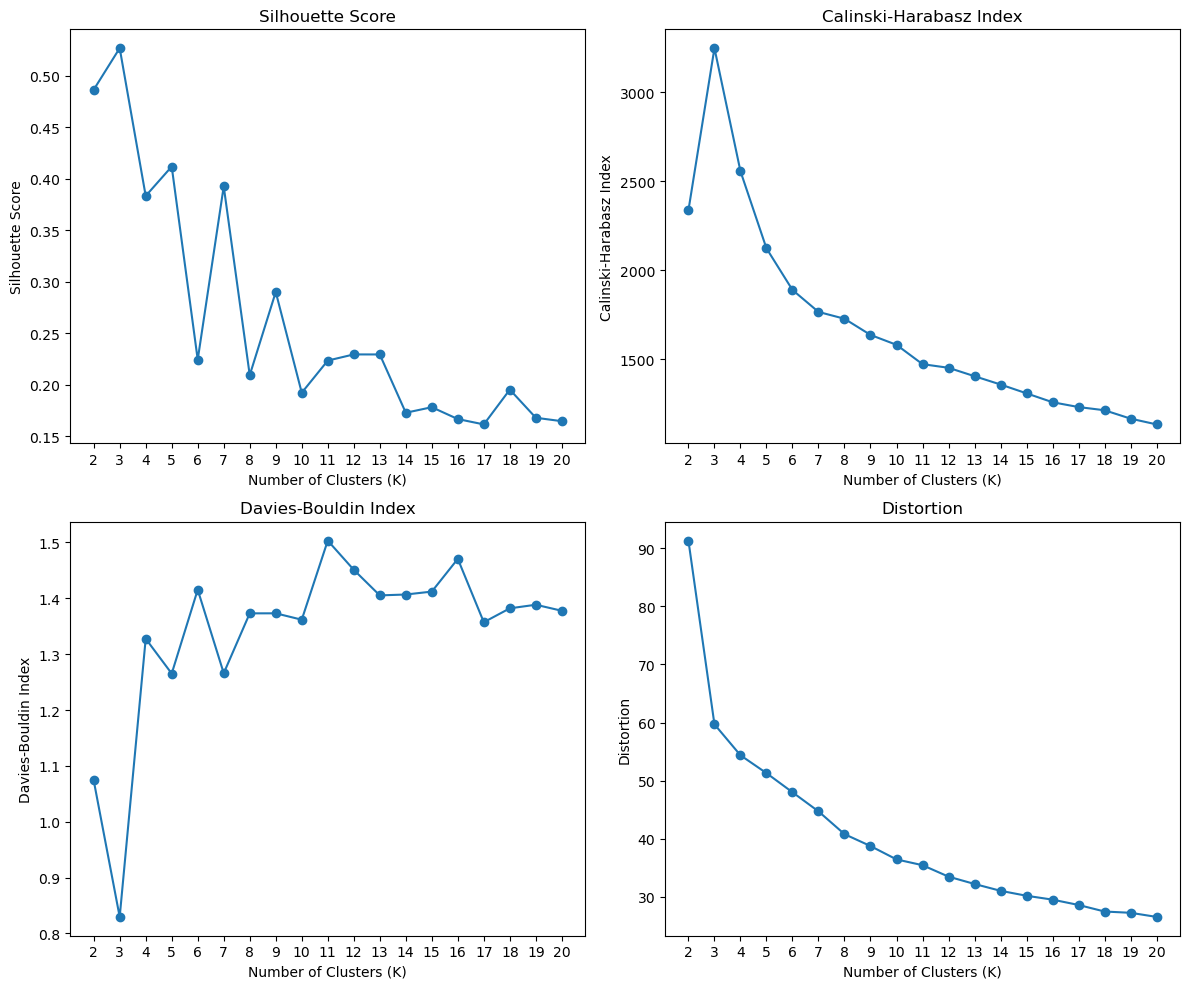

In [25]:
feature = ['X-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']
# case2
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
RideTrackAnalyzer.determine_optimal_clusters(DataSet[feature], 20, None)

In [26]:
for x in range (10):
    
    DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
    feature = ['X-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']
    
    
    now = datetime.now()
    date = now.strftime('%Y%m%d')
    now_time = now.strftime('%H%M%S')  # 格式化時間為HHMMSS，包括秒數
    print(now_time)
    model = f"{date}_model_{now_time}.pkl"
    RideTrackAnalyzer.cluster_data(DataSet, feature, method="kmeans", n_clusters=11, model_path=model, save_path='PCA_Im6_11_Cluster.csv')
    
    Train_Data = pd.read_csv('PCA_Im6_11_Cluster.csv')
    Test_Data = pd.read_csv('PCA_Im6_11_Cluster.csv')

    Train_Label = pd.read_csv('Train_Label.csv')
    Test_Label = pd.read_csv('Test_Label.csv')

    Train_Data['Action'] = Train_Label['Action']
    Test_Data['Action'] = Test_Label['Action']

    RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
    RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
    RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False)

010317
Execution time: 0.0 hours 0.0 minutes 0.5255849361419678 seconds
Execution time: 0.0 hours 0.0 minutes 4.90842080116272 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:29<00:00, 189.15it/s]


預測所花費時間：0小時0分鐘29秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  97.034401    51.754386   52.838428   83.75  46.610169   
1  Filter_Predict  97.983393    64.912281   63.318777   90.00  44.915254   

   Two-Stage Left  Accuracy (Total)  
0       66.120219         79.195916  
1       79.234973         83.918315  
010352
Execution time: 0.0 hours 0.0 minutes 0.53202223777771 seconds
Execution time: 0.0 hours 0.0 minutes 4.580016851425171 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:30<00:00, 180.41it/s]


預測所花費時間：0小時0分鐘30秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.406880    55.263158   63.318777   86.25  82.203390   
1  Filter_Predict  99.288256    68.421053   65.065502   90.00  80.508475   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         85.832802  
1       74.316940         87.236758  
010428
Execution time: 0.0 hours 0.0 minutes 0.543968915939331 seconds
Execution time: 0.0 hours 0.0 minutes 4.946182489395142 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:29<00:00, 189.66it/s]


預測所花費時間：0小時0分鐘29秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  98.813760    50.877193   57.641921   81.25       50.0   
1  Filter_Predict  99.051008    64.035088   63.755459   82.50       50.0   

   Two-Stage Left  Accuracy (Total)  
0       66.666667         80.982770  
1       79.234973         84.492661  
010503
Execution time: 0.0 hours 0.0 minutes 0.49703335762023926 seconds
Execution time: 0.0 hours 0.0 minutes 4.7600014209747314 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:29<00:00, 189.56it/s]


預測所花費時間：0小時0分鐘29秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.406880    31.578947   59.388646   83.75  70.338983   
1  Filter_Predict  99.288256    57.017544   60.262009   92.50  68.644068   

   Two-Stage Left  Accuracy (Total)  
0       64.480874         81.557116  
1       78.688525         85.449904  
010538
Execution time: 0.0 hours 0.0 minutes 0.537999153137207 seconds
Execution time: 0.0 hours 0.0 minutes 4.848971843719482 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:29<00:00, 188.84it/s]


預測所花費時間：0小時0分鐘29秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  98.932384    54.385965   54.148472   82.50  56.779661   
1  Filter_Predict  99.051008    64.912281   62.882096   88.75  53.389831   

   Two-Stage Left  Accuracy (Total)  
0       70.491803         81.812380  
1       81.967213         85.322272  
010613
Execution time: 0.0 hours 0.0 minutes 0.5199987888336182 seconds
Execution time: 0.0 hours 0.0 minutes 4.904999494552612 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:29<00:00, 188.72it/s]


預測所花費時間：0小時0分鐘29秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.288256    36.842105   52.401747    82.5  67.796610   
1  Filter_Predict  99.762752    49.122807   59.388646    90.0  66.101695   

   Two-Stage Left  Accuracy (Total)  
0       69.945355         81.238034  
1       80.874317         84.939375  
010649
Execution time: 0.0 hours 0.0 minutes 0.4900338649749756 seconds
Execution time: 0.0 hours 0.0 minutes 4.863997936248779 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:28<00:00, 193.34it/s]


預測所花費時間：0小時0分鐘28秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  97.627521    44.736842   49.344978   81.25  56.779661   
1  Filter_Predict  97.746145    57.017544   52.401747   82.50  57.627119   

   Two-Stage Left  Accuracy (Total)  
0       66.120219         79.132100  
1       72.131148         81.365667  
010723
Execution time: 0.0 hours 0.0 minutes 0.5060350894927979 seconds
Execution time: 0.0 hours 0.0 minutes 3.241274118423462 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:30<00:00, 181.58it/s]


預測所花費時間：0小時0分鐘30秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.051008    57.894737   60.698690   83.75  81.355932   
1  Filter_Predict  99.881376    64.035088   65.502183   86.25  89.830508   

   Two-Stage Left  Accuracy (Total)  
0       65.027322         84.365029  
1       71.584699         87.492023  
010758
Execution time: 0.0 hours 0.0 minutes 0.5069894790649414 seconds
Execution time: 0.0 hours 0.0 minutes 4.860971212387085 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:28<00:00, 192.66it/s]


預測所花費時間：0小時0分鐘28秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  98.695136    54.385965   55.021834   81.25  52.542373   
1  Filter_Predict  99.051008    71.052632   61.572052   83.75  53.389831   

   Two-Stage Left  Accuracy (Total)  
0       69.398907         81.301851  
1       77.049180         84.747926  
010832
Execution time: 0.0 hours 0.0 minutes 0.5279953479766846 seconds
Execution time: 0.0 hours 0.0 minutes 4.940996885299683 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:28<00:00, 192.54it/s]


預測所花費時間：0小時0分鐘28秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  98.220641     50.00000   51.091703   82.50  56.779661   
1  Filter_Predict  98.695136     67.54386   58.078603   86.25  57.627119   

   Two-Stage Left  Accuracy (Total)  
0       67.213115         80.280791  
1       72.131148         83.663050  


In [43]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
feature = ['X-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

RideTrackAnalyzer.predict_cluster(DataSet, feature, '20230716_model_010723.pkl', 'Ablation2_case3_1_11_Cluster.csv')
    
Train_Data = pd.read_csv('Ablation2_case3_1_11_Cluster.csv')
Test_Data = pd.read_csv('Ablation2_case3_1_11_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.2848649024963379 seconds
Execution time: 0.0 hours 0.0 minutes 3.2530298233032227 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:30<00:00, 180.41it/s]


預測所花費時間：0小時0分鐘30秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.051008    57.894737   60.698690   83.75  81.355932   
1  Filter_Predict  99.881376    64.035088   65.502183   86.25  89.830508   

   Two-Stage Left  Accuracy (Total)  
0       65.027322         84.365029  
1       71.584699         87.492023  
|    | RideTrack      |    Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|--------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 99.051  |       57.8947 |      60.6987 |    83.75 |     81.3559 |          65.0273 |             84.365 |
|  1 | Filter_Predict | 99.8814 |       64.0351 |      65.5022 |    86.25 |     89.8305 |          71.5847 |             87.492 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,73,31,0,0,10,0,64.035088
1,Idle,0,842,0,0,1,0,99.881376
2,Turn Left,6,0,106,3,0,3,89.830508
3,Turn Right,53,8,5,150,6,7,65.502183
4,Two-Stage Left,23,11,0,18,131,0,71.584699
5,U-turn,0,9,0,2,0,69,86.250000


In [27]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
DataSet.columns

Index(['Unnamed: 0', 'Atmospheric Pressure', 'Inclination Switch',
       'Fault Code Count', 'Ignition Coil Current Diagnosis',
       'Fault Light Mileage', 'Engine Operating Time',
       'Ignition Advance Angle', 'Idling Correction Ignition Angle',
       'Fuel Injection Prohibition Mode', 'Injection Mode',
       'Bypass Delay Correction', 'ABV Opening', 'ABV Idling Correction',
       'ABV Learning Value', 'Lambda Setting', 'Air-Fuel Ratio Rich',
       'Closed Loop Control', 'Air Flow', 'Throttle Valve Air Flow',
       'Intake Manifold Pressure', 'Intake Manifold Front Pressure',
       'MFF_AD_ADD_MMV_REL', 'MFF_AD_FAC_MMV_REL', 'MFF_AD_ADD_MMV',
       'MFF_AD_FAC_MMV', 'Fuel Injection Quantity', 'MFF_WUP_COR',
       'Ignition Mode', 'Engine RPM', 'Engine RPM Limit', 'Idling Target RPM',
       'Fuel Injection Start Angle', 'Fuel Pump State', 'Engine State',
       'Engine Temperature', 'Water Temperature PWM',
       'Ignition Magnetization Time', 'Fuel Injection Time',
   

In [28]:
feature = ['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

In [35]:
Total_Label = pd.read_csv('Total_Label.csv') 
DataSet['Action'] = Total_Label['Action']
DataSet = DataSet.dropna()

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(DataSet[feature], DataSet['Action'])
feature_importances = clf.feature_importances_
feature_importances

array([0.10637213, 0.10609339, 0.32063032, 0.09066666, 0.03721891,
       0.04635219, 0.1630353 , 0.08521889, 0.04441219])

In [41]:
print(pd.DataFrame(feature_importances).T.to_markdown())

|    |        0 |        1 |       2 |         3 |         4 |         5 |        6 |         7 |         8 |
|---:|---------:|---------:|--------:|----------:|----------:|----------:|---------:|----------:|----------:|
|  0 | 0.106372 | 0.106093 | 0.32063 | 0.0906667 | 0.0372189 | 0.0463522 | 0.163035 | 0.0852189 | 0.0444122 |


In [31]:
#'Z-axis Angular Velocity'   31          ###############         
#  'X-axis Angle'            16          ###############
# 'Y-axis Angular Velocity'  11
# 'X-axis Angular Velocity'  10          ###############
# 'X-axis Acceleration'      8          ###############
# 'Y-axis Angle'             8          ###############

In [32]:
for x in range (10):
    
    DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
    feature = ['X-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'X-axis Angle']
    
    
    now = datetime.now()
    date = now.strftime('%Y%m%d')
    now_time = now.strftime('%H%M%S')  # 格式化時間為HHMMSS，包括秒數
    print(now_time)
    model = f"{date}_model_{now_time}.pkl"
    RideTrackAnalyzer.cluster_data(DataSet, feature, method="kmeans", n_clusters=11, model_path=model, save_path='PCA_RT_Im6_11_Cluster.csv')
    
    Train_Data = pd.read_csv('PCA_RT_Im6_11_Cluster.csv')
    Test_Data = pd.read_csv('PCA_RT_Im6_11_Cluster.csv')

    Train_Label = pd.read_csv('Train_Label.csv')
    Test_Label = pd.read_csv('Test_Label.csv')

    Train_Data['Action'] = Train_Label['Action']
    Test_Data['Action'] = Test_Label['Action']

    RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
    RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
    RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False)

011344
Execution time: 0.0 hours 0.0 minutes 0.594367504119873 seconds
Execution time: 0.0 hours 0.0 minutes 2.2969977855682373 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 175.93it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.644128    53.508772   67.248908   78.75  94.915254   
1  Filter_Predict  99.881376    59.649123   73.799127   88.75  96.610169   

   Two-Stage Left  Accuracy (Total)  
0       75.409836         87.300574  
1       80.874317         90.108488  
011419
Execution time: 0.0 hours 0.0 minutes 0.4979970455169678 seconds
Execution time: 0.0 hours 0.0 minutes 2.1820290088653564 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 172.99it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.644128    47.368421   68.558952   81.25  92.372881   
1  Filter_Predict  99.881376    44.736842   73.362445   87.50  92.372881   

   Two-Stage Left  Accuracy (Total)  
0       73.224044         86.726228  
1       77.595628         88.194001  
011454
Execution time: 0.0 hours 0.0 minutes 0.5419728755950928 seconds
Execution time: 0.0 hours 0.0 minutes 2.2329893112182617 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:30<00:00, 178.42it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.644128    47.368421   68.558952   81.25  92.372881   
1  Filter_Predict  99.881376    44.736842   73.362445   87.50  92.372881   

   Two-Stage Left  Accuracy (Total)  
0       73.224044         86.726228  
1       77.595628         88.194001  
011528
Execution time: 0.0 hours 0.0 minutes 0.4999995231628418 seconds
Execution time: 0.0 hours 0.0 minutes 2.2869839668273926 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:30<00:00, 178.63it/s]


預測所花費時間：0小時0分鐘30秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.644128    49.122807   67.248908   78.75  95.762712   
1  Filter_Predict  99.881376    50.000000   73.799127   88.75  96.610169   

   Two-Stage Left  Accuracy (Total)  
0       73.224044         86.790045  
1       77.049180         88.959796  
011603
Execution time: 0.0 hours 0.0 minutes 0.5209968090057373 seconds
Execution time: 0.0 hours 0.0 minutes 2.18697190284729 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 175.34it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.644128    46.491228   66.812227   78.75  94.915254   
1  Filter_Predict  99.881376    55.263158   74.235808   88.75  93.220339   

   Two-Stage Left  Accuracy (Total)  
0       73.224044         86.470964  
1       78.688525         89.342693  
011637
Execution time: 0.0 hours 0.0 minutes 0.5160977840423584 seconds
Execution time: 0.0 hours 0.0 minutes 2.220036029815674 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 175.77it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.644128    60.526316   76.855895    80.0  82.203390   
1  Filter_Predict  99.881376    61.403509   82.969432    90.0  94.915254   

   Two-Stage Left  Accuracy (Total)  
0       65.573770         87.172942  
1       72.677596         90.555201  
011712
Execution time: 0.0 hours 0.0 minutes 0.5129680633544922 seconds
Execution time: 0.0 hours 0.0 minutes 2.22196888923645 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 176.87it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.644128    47.368421   68.122271   82.50  92.372881   
1  Filter_Predict  99.881376    44.736842   72.925764   88.75  92.372881   

   Two-Stage Left  Accuracy (Total)  
0       73.224044         86.726228  
1       77.595628         88.194001  
011746
Execution time: 0.0 hours 0.0 minutes 0.5060000419616699 seconds
Execution time: 0.0 hours 0.0 minutes 2.3139662742614746 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 177.15it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.644128         50.0   67.248908   78.75  94.915254   
1  Filter_Predict  99.881376         50.0   73.799127   88.75  96.610169   

   Two-Stage Left  Accuracy (Total)  
0       73.224044         86.790045  
1       77.049180         88.959796  
011821
Execution time: 0.0 hours 0.0 minutes 0.5050129890441895 seconds
Execution time: 0.0 hours 0.0 minutes 2.218355178833008 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 177.03it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.881376    46.491228   67.248908    82.5  94.067797   
1  Filter_Predict  99.881376    50.000000   73.362445    90.0  95.762712   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         86.726228  
1       79.781421         89.215061  
011855
Execution time: 0.0 hours 0.0 minutes 0.49602627754211426 seconds
Execution time: 0.0 hours 0.0 minutes 2.280998706817627 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 174.16it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.644128    49.122807   65.065502   78.75  94.915254   
1  Filter_Predict  99.881376    58.771930   71.179039   88.75  96.610169   

   Two-Stage Left  Accuracy (Total)  
0       73.770492         86.470964  
1       79.781421         89.534142  


In [44]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    

feature = ['X-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'X-axis Angle']

RideTrackAnalyzer.predict_cluster(DataSet, feature, '20230716_model_011637.pkl', 'Ablation2_case3_2_11_Cluster.csv')
    
Train_Data = pd.read_csv('Ablation2_case3_2_11_Cluster.csv')
Test_Data = pd.read_csv('Ablation2_case3_2_11_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.298999547958374 seconds
Execution time: 0.0 hours 0.0 minutes 2.2689993381500244 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 177.33it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.644128    60.526316   76.855895    80.0  82.203390   
1  Filter_Predict  99.881376    61.403509   82.969432    90.0  94.915254   

   Two-Stage Left  Accuracy (Total)  
0       65.573770         87.172942  
1       72.677596         90.555201  
|    | RideTrack      |    Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|--------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 99.6441 |       60.5263 |      76.8559 |       80 |     82.2034 |          65.5738 |            87.1729 |
|  1 | Filter_Predict | 99.8814 |       61.4035 |      82.9694 |       90 |     94.9153 |          72.6776 |            90.5552 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,70,21,0,0,23,0,61.403509
1,Idle,0,842,0,0,1,0,99.881376
2,Turn Left,0,0,112,0,0,6,94.915254
3,Turn Right,30,0,0,190,9,0,82.969432
4,Two-Stage Left,23,22,1,0,133,4,72.677596
5,U-turn,0,7,0,1,0,72,90.000000


In [ ]:
# case4 PCA 到 3

In [45]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6_10_Cluster.csv')

feature = ['X-axis Angular Velocity',
       'Y-axis Angular Velocity', 'Z-axis Angular Velocity',
       'X-axis Acceleration', 'Y-axis Acceleration', 'Z-axis Acceleration',
       'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']

RideTrackAnalyzer.apply_pca(DataSet[feature], 3, 'Case6_PCA_3.pkl')
print(RideTrackAnalyzer.get_feature_weights(DataSet[feature], 'Case6_PCA_3.pkl').to_markdown())

適合降至3維度
Execution time: 0.0 hours 0.0 minutes 0.004984855651855469 seconds
Execution time: 0.0 hours 0.0 minutes 0.00500178337097168 seconds
|    | Feature                 |    Weight |
|---:|:------------------------|----------:|
|  8 | Z-axis Angle            | 0.325083  |
|  2 | Z-axis Angular Velocity | 0.323138  |
|  0 | X-axis Angular Velocity | 0.295684  |
|  7 | Y-axis Angle            | 0.285123  |
|  3 | X-axis Acceleration     | 0.159985  |
|  6 | X-axis Angle            | 0.097919  |
|  4 | Y-axis Acceleration     | 0.0846117 |
|  1 | Y-axis Angular Velocity | 0.058265  |
|  5 | Z-axis Acceleration     | 0.0135663 |


In [46]:
df_pca = RideTrackAnalyzer.load_and_transform_with_pca('Case6_PCA_3.pkl', DataSet[feature])

In [47]:
DF_PCA = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
DF_PCA.to_csv('DF_PCA_3.csv')

In [48]:
DF_PCA

,PC1,PC2,PC3
0,-0.048227,-0.008778,-0.017567
1,-0.039705,-0.011118,-0.010409
2,0.001210,-0.009272,-0.036547
3,-0.029975,-0.009763,-0.020715
4,-0.041229,0.003901,-0.026909
...,...,...,...
5511,-0.095775,-0.008969,0.001635
5512,-0.091304,-0.013776,-0.002172
5513,-0.077280,-0.009751,-0.012824
5514,-0.092343,-0.001504,-0.004622


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:10<00:00,  1.75it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [10 11  9  8  7  6  5  4  3  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11 12 13 14 16 15 17 18 19 20]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [13  5  8 17 14 18 15 16 19 20]
根據 Distortion，前 10 個建議的分群數量分別為 [20 19 18 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 set()
Execution time: 0.0 hours 0.0 minutes 11.011425256729126 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.625868             16467.021453              0.500000   
 3           0.589907             22050.325164              0.500000   
 4           0.568843             26371.643784              0.500000   
 5           0.558989             31848.247920              0.500001   
 6           0.550351             37044.308922              0.500000   
 7           0.544890             37946.761466              0.500000   
 8           0.541814             48910.497707              0.500001   
 9           0.539148             54399.356514              0.500000   
 10          0.533641             57196.350398              0.500000   
 11          0.533952             64645.678486              0.500001   
 12          0.533544             70773.259999              0.500000   
 13          0.531388             73512.937316              0.500001   
 14          0.530087             79883.441117              0.50

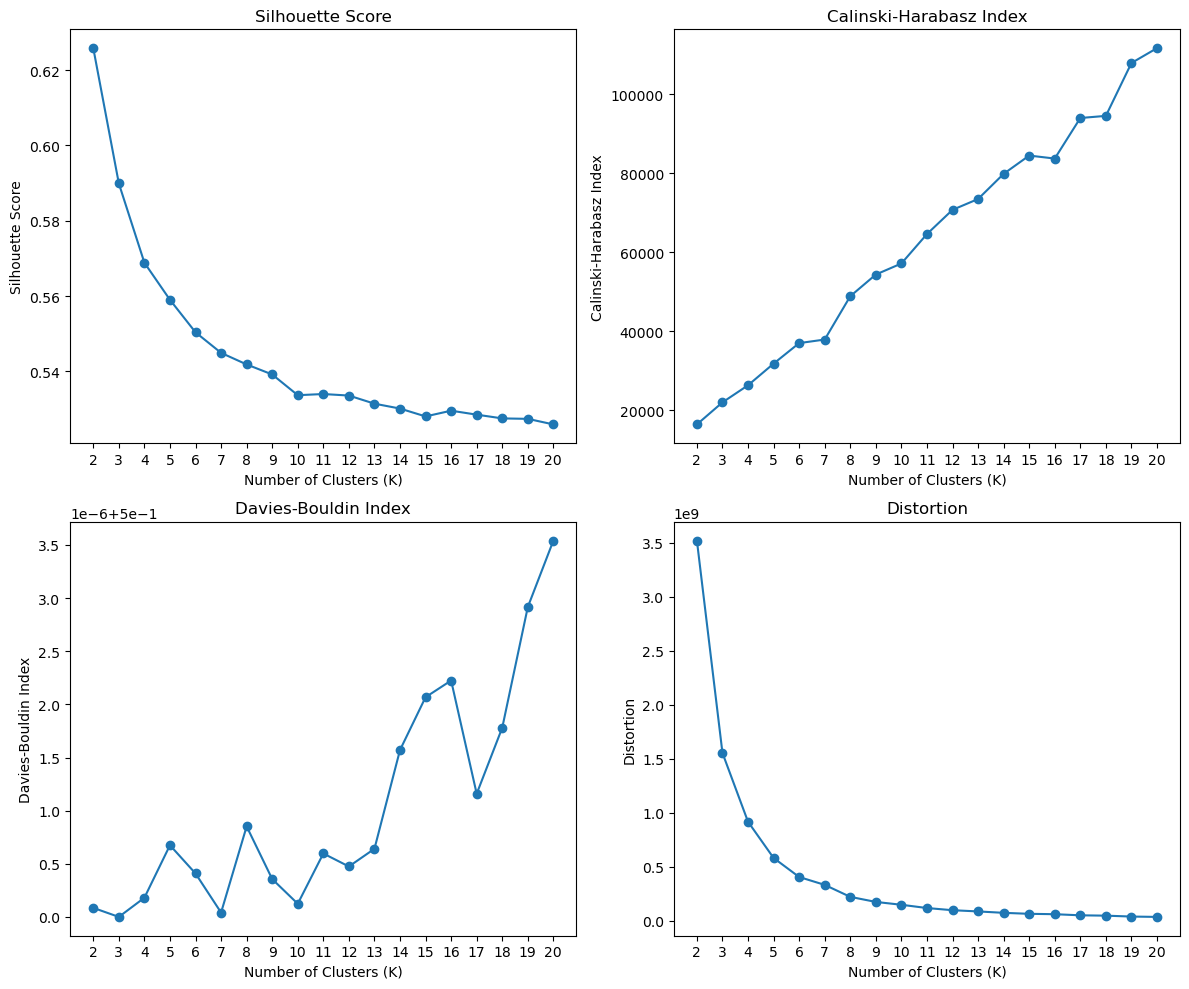

In [49]:
# case2
DataSet = pd.read_csv('DF_PCA_3.csv')
RideTrackAnalyzer.determine_optimal_clusters(DataSet, 20, None)

In [50]:
#case 4
DF_PCA
for x in range (10):
    
    DataSet = pd.read_csv('DF_PCA_3.csv')
    
    now = datetime.now()
    date = now.strftime('%Y%m%d')
    now_time = now.strftime('%H%M%S')  # 格式化時間為HHMMSS，包括秒數
    print(now_time)
    model = f"{date}_model_{now_time}.pkl"
    RideTrackAnalyzer.cluster_data(DataSet, DataSet.columns, method="kmeans", n_clusters=11, model_path=model, save_path='DF_PCA_3_F6_11_Cluster.csv')
    
    Train_Data = pd.read_csv('DF_PCA_3_F6_11_Cluster.csv')
    Test_Data = pd.read_csv('DF_PCA_3_F6_11_Cluster.csv')

    Train_Label = pd.read_csv('Train_Label.csv')
    Test_Label = pd.read_csv('Test_Label.csv')

    Train_Data['Action'] = Train_Label['Action']
    Test_Data['Action'] = Test_Label['Action']

    RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
    RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
    RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False)
    
    
    
    


015110
Execution time: 0.0 hours 0.0 minutes 0.2559986114501953 seconds
Execution time: 0.0 hours 0.0 minutes 0.7549998760223389 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 127.99it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0        0.0   
1  Filter_Predict  0.000000    71.929825         0.0     0.0        0.0   

   Two-Stage Left  Accuracy (Total)  
0        3.278689          5.679643  
1        3.278689          5.615826  
015155
Execution time: 0.0 hours 0.0 minutes 0.2579669952392578 seconds
Execution time: 0.0 hours 0.0 minutes 0.737032413482666 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 126.65it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0  25.423729   
1  Filter_Predict  0.000000    71.929825         0.0     0.0  25.423729   

   Two-Stage Left  Accuracy (Total)  
0             0.0          7.211232  
1             0.0          7.147415  
015240
Execution time: 0.0 hours 0.0 minutes 0.25899839401245117 seconds
Execution time: 0.0 hours 0.0 minutes 0.7935245037078857 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 128.20it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0  25.423729   
1  Filter_Predict  0.000000    71.929825         0.0     0.0  25.423729   

   Two-Stage Left  Accuracy (Total)  
0        6.557377          7.977026  
1        6.557377          7.913210  
015324
Execution time: 0.0 hours 0.0 minutes 0.2539997100830078 seconds
Execution time: 0.0 hours 0.0 minutes 0.7229993343353271 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 128.13it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0  12.711864   
1  Filter_Predict  0.000000    71.929825         0.0     0.0  12.711864   

   Two-Stage Left  Accuracy (Total)  
0        3.825137          6.700702  
1        3.825137          6.636886  
015408
Execution time: 0.0 hours 0.0 minutes 0.2519669532775879 seconds
Execution time: 0.0 hours 0.0 minutes 0.755002498626709 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:44<00:00, 125.15it/s]


預測所花費時間：0小時0分鐘44秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  13.997628    71.929825         0.0     0.0        0.0   
1  Filter_Predict  13.879004    71.929825         0.0     0.0        0.0   

   Two-Stage Left  Accuracy (Total)  
0             0.0         12.763242  
1             0.0         12.699426  
015454
Execution time: 0.0 hours 0.0 minutes 0.25096964836120605 seconds
Execution time: 0.0 hours 0.0 minutes 0.7520332336425781 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 127.80it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0  25.423729   
1  Filter_Predict  0.000000    71.929825         0.0     0.0  25.423729   

   Two-Stage Left  Accuracy (Total)  
0             0.0          7.211232  
1             0.0          7.147415  
015538
Execution time: 0.0 hours 0.0 minutes 0.25496745109558105 seconds
Execution time: 0.0 hours 0.0 minutes 0.7540276050567627 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 126.93it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0  25.423729   
1  Filter_Predict  0.000000    71.929825         0.0     0.0  25.423729   

   Two-Stage Left  Accuracy (Total)  
0        0.546448          7.275048  
1        0.546448          7.211232  
015623
Execution time: 0.0 hours 0.0 minutes 0.2669692039489746 seconds
Execution time: 0.0 hours 0.0 minutes 0.8380293846130371 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 125.40it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0  25.423729   
1  Filter_Predict  0.000000    71.929825         0.0     0.0  25.423729   

   Two-Stage Left  Accuracy (Total)  
0             0.0          7.211232  
1             0.0          7.147415  
015708
Execution time: 0.0 hours 0.0 minutes 0.25699830055236816 seconds
Execution time: 0.0 hours 0.0 minutes 0.7180294990539551 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 128.25it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    46.491228         0.0     0.0  21.186441   
1  Filter_Predict  0.000000    46.491228         0.0     0.0  21.186441   

   Two-Stage Left  Accuracy (Total)  
0       13.661202          6.636886  
1       13.661202          6.573070  
015753
Execution time: 0.0 hours 0.0 minutes 0.2519698143005371 seconds
Execution time: 0.0 hours 0.0 minutes 0.7190306186676025 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 127.24it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    71.929825         0.0     0.0        0.0   
1  Filter_Predict  0.000000    71.929825         0.0     0.0        0.0   

   Two-Stage Left  Accuracy (Total)  
0             0.0          5.296745  
1             0.0          5.232929  


In [51]:
#case 6

DataSet = pd.read_csv('DF_PCA_3.csv')
    
RideTrackAnalyzer.predict_cluster(DataSet, DataSet.columns, '20230716_model_015708.pkl', 'Ablation2_case4_11_Cluster.csv')
    
Train_Data = pd.read_csv('Ablation2_case4_11_Cluster.csv')
Test_Data = pd.read_csv('Ablation2_case4_11_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.05096888542175293 seconds
Execution time: 0.0 hours 0.0 minutes 0.7225375175476074 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:43<00:00, 127.67it/s]


預測所花費時間：0小時0分鐘43秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  0.118624    46.491228         0.0     0.0  21.186441   
1  Filter_Predict  0.000000    46.491228         0.0     0.0  21.186441   

   Two-Stage Left  Accuracy (Total)  
0       13.661202          6.636886  
1       13.661202          6.573070  
|    | RideTrack      |     Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|---------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 0.118624 |       46.4912 |            0 |        0 |     21.1864 |          13.6612 |            6.63689 |
|  1 | Filter_Predict | 0        |       46.4912 |            0 |        0 |     21.1864 |          13.6612 |            6.57307 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |  

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,53,0,32,0,29,0,46.491228
1,Idle,384,0,117,0,342,0,0.000000
2,Turn Left,41,43,25,6,3,0,21.186441
3,Turn Right,98,41,39,0,51,0,0.000000
4,Two-Stage Left,97,0,61,0,25,0,13.661202
5,U-turn,18,0,20,0,42,0,0.000000


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:10<00:00,  1.80it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [13  9 11  7  6  8  4  5  3  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [12 10  8  9  4  7  6  5  3  2]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [14 17 20  9  7 13 10 16 18 19]
根據 Distortion，前 10 個建議的分群數量分別為 [20 18 19 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 {9, 7}
Execution time: 0.0 hours 0.0 minutes 10.710027933120728 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.817291              8307.017780              0.463852   
 3           0.613456              6137.375991              0.756765   
 4           0.600740              4895.199853              0.859180   
 5           0.606922              5541.012077              0.825324   
 6           0.542383              5298.971861              0.886895   
 7           0.531410              5043.763033              0.911563   
 8           0.547281              4805.837149              0.891854   
 9           0.449319              4858.115910              0.904665   
 10          0.408156              4671.010288              0.923271   
 11          0.526370              4597.695042              0.880572   
 12          0.407953              4635.033862              0.860671   
 13          0.409068              4557.661357              0.911649   
 14          0.351280              4501.250404              0.89

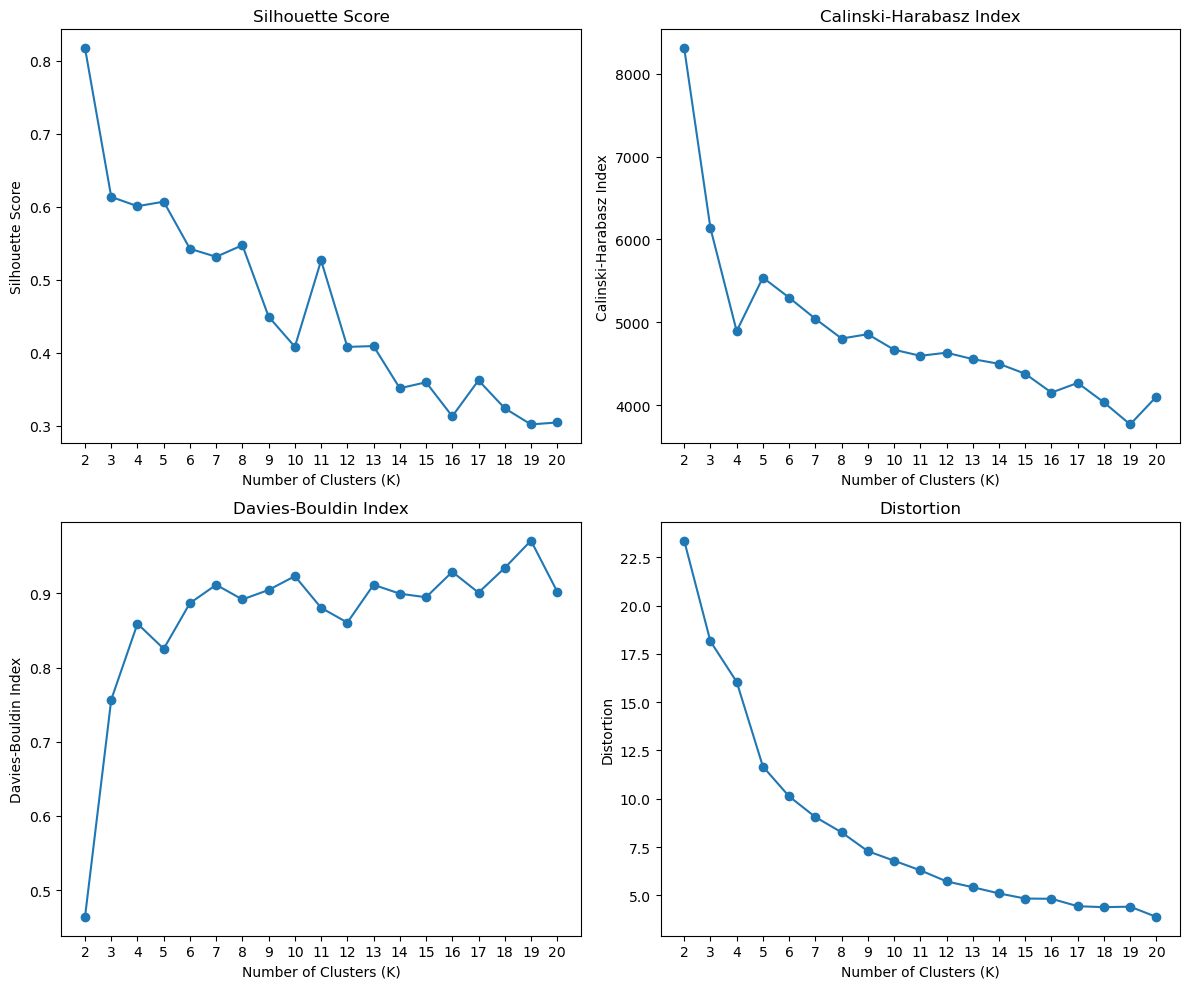

In [52]:

DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
feature = ['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity']
    
RideTrackAnalyzer.determine_optimal_clusters(DataSet[feature], 20, None)

In [53]:
for x in range (10):
    
    DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
    feature = ['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity']
    
    
    now = datetime.now()
    date = now.strftime('%Y%m%d')
    now_time = now.strftime('%H%M%S')  # 格式化時間為HHMMSS，包括秒數
    print(now_time)
    model = f"{date}_model_{now_time}.pkl"
    RideTrackAnalyzer.cluster_data(DataSet, feature, method="kmeans", n_clusters=9, model_path=model, save_path='PCA_3_Angular_Velocity_11_Cluster.csv')
    
    Train_Data = pd.read_csv('PCA_3_Angular_Velocity_11_Cluster.csv')
    Test_Data = pd.read_csv('PCA_3_Angular_Velocity_11_Cluster.csv')

    Train_Label = pd.read_csv('Train_Label.csv')
    Test_Label = pd.read_csv('Test_Label.csv')

    Train_Data['Action'] = Train_Label['Action']
    Test_Data['Action'] = Test_Label['Action']

    RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 9, False)
    RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
    RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False)

021138
Execution time: 0.0 hours 0.0 minutes 0.513028621673584 seconds
Execution time: 0.0 hours 0.0 minutes 2.0610287189483643 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:40<00:00, 135.48it/s]


預測所花費時間：0小時0分鐘40秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.881376    21.929825   89.956332   71.25  98.305085   
1  Filter_Predict  99.881376    29.824561   89.519651   83.75  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       48.633880         85.194639  
1       56.284153         87.236758  
021222
Execution time: 0.0 hours 0.0 minutes 0.48199915885925293 seconds
Execution time: 0.0 hours 0.0 minutes 2.0050275325775146 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:40<00:00, 137.69it/s]


預測所花費時間：0小時0分鐘40秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  99.762752    27.192982   91.703057   67.50   99.152542   
1  Filter_Predict  99.881376    28.070175   93.013100   81.25  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       46.994536         85.449904  
1       55.737705         87.555839  
021305
Execution time: 0.0 hours 0.0 minutes 0.49699974060058594 seconds
Execution time: 0.0 hours 0.0 minutes 2.060997724533081 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:39<00:00, 139.45it/s]


預測所花費時間：0小時0分鐘39秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.881376    21.929825   92.139738   63.75  98.305085   
1  Filter_Predict  99.881376    29.824561   92.139738   81.25  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       50.273224         85.322272  
1       57.377049         87.619655  
021348
Execution time: 0.0 hours 0.0 minutes 0.48402929306030273 seconds
Execution time: 0.0 hours 0.0 minutes 2.0159974098205566 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:40<00:00, 134.99it/s]


預測所花費時間：0小時0分鐘40秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.881376    23.684211   91.266376   68.75  98.305085   
1  Filter_Predict  99.881376    29.824561   93.013100   83.75  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       50.819672         85.641353  
1       61.202186         88.321634  
021432
Execution time: 0.0 hours 0.0 minutes 0.48796987533569336 seconds
Execution time: 0.0 hours 0.0 minutes 2.109005928039551 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:40<00:00, 135.32it/s]


預測所花費時間：0小時0分鐘40秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.881376    21.929825   91.703057   66.25  98.305085   
1  Filter_Predict  99.881376    29.824561   92.139738   81.25  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       50.273224         85.386088  
1       61.748634         88.130185  
021516
Execution time: 0.0 hours 0.0 minutes 0.48999977111816406 seconds
Execution time: 0.0 hours 0.0 minutes 2.0219693183898926 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:40<00:00, 137.16it/s]


預測所花費時間：0小時0分鐘40秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.881376    24.561404   90.393013   68.75  98.305085   
1  Filter_Predict  99.881376    32.456140   90.829694   83.75  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       46.994536         85.130823  
1       49.726776         86.853861  
021559
Execution time: 0.0 hours 0.0 minutes 0.48599910736083984 seconds
Execution time: 0.0 hours 0.0 minutes 2.0139682292938232 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:39<00:00, 139.05it/s]


預測所花費時間：0小時0分鐘39秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.762752    27.192982   91.266376   67.50  98.305085   
1  Filter_Predict  99.881376    28.070175   93.013100   81.25  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       47.540984         85.386088  
1       60.655738         88.002553  
021642
Execution time: 0.0 hours 0.0 minutes 0.4799978733062744 seconds
Execution time: 0.0 hours 0.0 minutes 2.0329642295837402 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:40<00:00, 136.59it/s]


預測所花費時間：0小時0分鐘40秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.881376    21.929825   91.703057   63.75  98.305085   
1  Filter_Predict  99.881376    29.824561   90.829694   81.25  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       49.726776         85.194639  
1       56.284153         87.300574  
021725
Execution time: 0.0 hours 0.0 minutes 0.4970269203186035 seconds
Execution time: 0.0 hours 0.0 minutes 1.9910008907318115 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:39<00:00, 138.92it/s]


預測所花費時間：0小時0分鐘39秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  99.881376    22.807018   92.139738   68.75   99.152542   
1  Filter_Predict  99.881376    26.315789   93.013100   86.25  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       53.551913         86.088066  
1       65.573770         88.832163  
021808
Execution time: 0.0 hours 0.0 minutes 0.494016170501709 seconds
Execution time: 0.0 hours 0.0 minutes 2.0660018920898438 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:40<00:00, 135.04it/s]


預測所花費時間：0小時0分鐘40秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.881376    23.684211   90.393013    67.5  98.305085   
1  Filter_Predict  99.881376    29.824561   90.829694    92.5  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       51.366120         85.513720  
1       57.923497         88.066369  


In [54]:
#case 6
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
feature = ['X-axis Angular Velocity', 'Y-axis Angular Velocity', 'Z-axis Angular Velocity']

RideTrackAnalyzer.predict_cluster(DataSet, feature, '20230716_model_021725.pkl', 'Ablation2_case5_9_Cluster.csv')
    
Train_Data = pd.read_csv('Ablation2_case5_9_Cluster.csv')
Test_Data = pd.read_csv('Ablation2_case5_9_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 9, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.27658653259277344 seconds
Execution time: 0.0 hours 0.0 minutes 2.0063774585723877 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:39<00:00, 139.00it/s]


預測所花費時間：0小時0分鐘39秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  99.881376    22.807018   92.139738   68.75   99.152542   
1  Filter_Predict  99.881376    26.315789   93.013100   86.25  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       53.551913         86.088066  
1       65.573770         88.832163  
|    | RideTrack      |    Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|--------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 99.8814 |       22.807  |      92.1397 |    68.75 |     99.1525 |          53.5519 |            86.0881 |
|  1 | Filter_Predict | 99.8814 |       26.3158 |      93.0131 |    86.25 |    100      |          65.5738 |            88.8322 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,30,74,0,0,10,0,26.315789
1,Idle,0,842,0,0,1,0,99.881376
2,Turn Left,0,0,118,0,0,0,100.000000
3,Turn Right,9,6,0,213,1,0,93.013100
4,Two-Stage Left,12,36,0,15,120,0,65.573770
5,U-turn,0,3,0,2,6,69,86.250000


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:10<00:00,  1.83it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [13 10 14  9  6  5  8  3  4  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [12  7 11 10  9  8  6  5  4  3]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [14 10 11 20 19 16 17  7 18  2]
根據 Distortion，前 10 個建議的分群數量分別為 [20 19 18 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 {10}
Execution time: 0.0 hours 0.0 minutes 10.501573324203491 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.536798              2102.947533              1.341773   
 3           0.534465              4316.951097              0.780011   
 4           0.534849              3481.512485              0.894505   
 5           0.442006              3143.314540              1.060521   
 6           0.376227              2871.984610              1.084292   
 7           0.282612              2457.498412              1.179623   
 8           0.444347              2680.472357              1.036753   
 9           0.315963              2670.671870              1.059109   
 10          0.299137              2552.646943              1.102259   
 11          0.296304              2457.959554              1.118820   
 12          0.297454              2374.145921              1.086015   
 13          0.298322              2326.523803              1.077214   
 14          0.301472              2252.559747              1.09

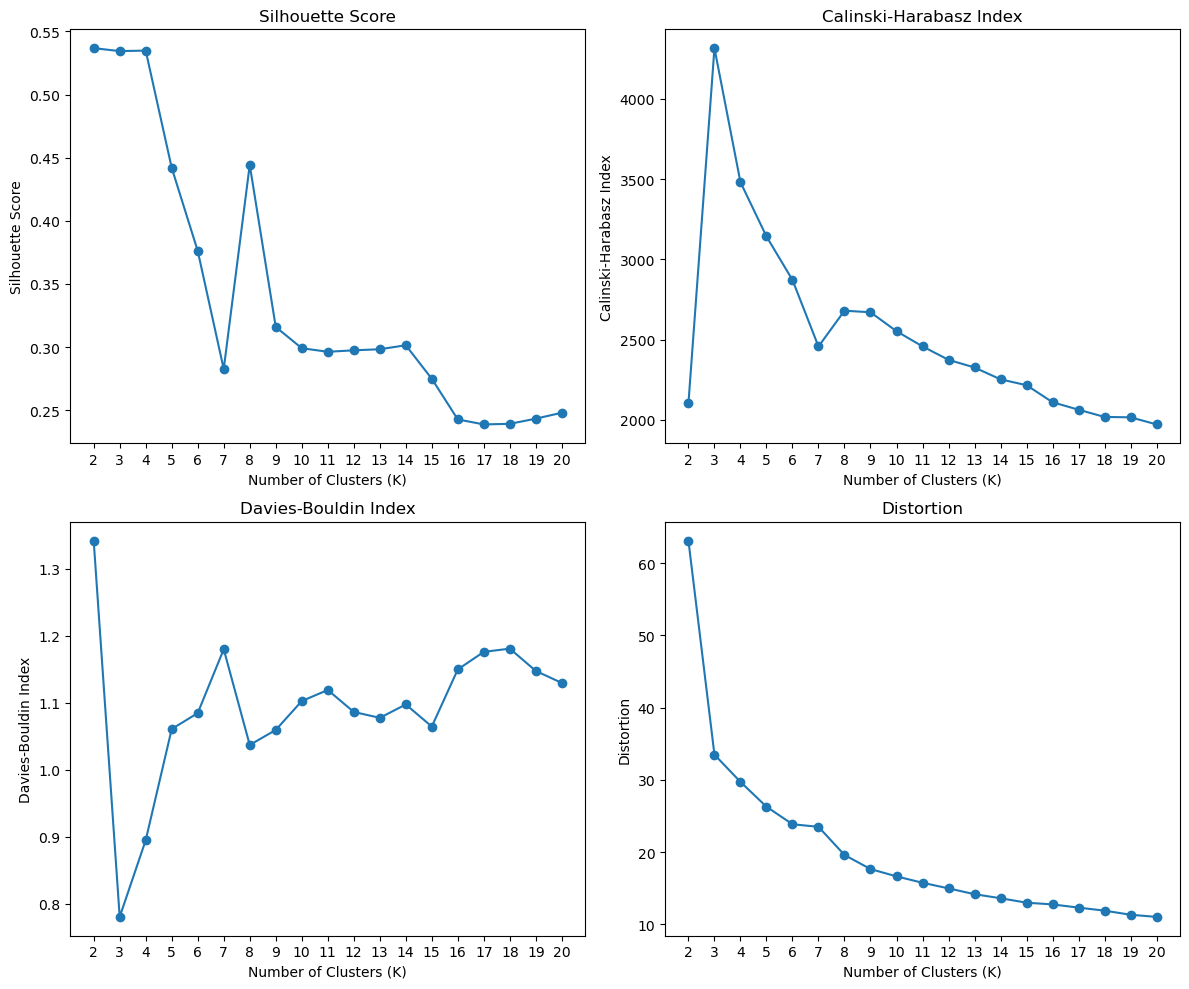

In [55]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
feature = ['X-axis Angular Velocity', 'Z-axis Angle',
       'Z-axis Angular Velocity']
    
RideTrackAnalyzer.determine_optimal_clusters(DataSet[feature], 20, None)

In [57]:
for x in range (10):
    
    DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
    feature = ['X-axis Angular Velocity', 'Z-axis Angle',
       'Z-axis Angular Velocity']
    
    
    now = datetime.now()
    date = now.strftime('%Y%m%d')
    now_time = now.strftime('%H%M%S')  # 格式化時間為HHMMSS，包括秒數
    print(now_time)
    model = f"{date}_model_{now_time}.pkl"
    RideTrackAnalyzer.cluster_data(DataSet, feature, method="kmeans", n_clusters=10, model_path=model, save_path='PCA_3_Angular_Velocity_10_Cluster.csv')
    
    Train_Data = pd.read_csv('PCA_3_Angular_Velocity_10_Cluster.csv')
    Test_Data = pd.read_csv('PCA_3_Angular_Velocity_10_Cluster.csv')

    Train_Label = pd.read_csv('Train_Label.csv')
    Test_Label = pd.read_csv('Test_Label.csv')

    Train_Data['Action'] = Train_Label['Action']
    Test_Data['Action'] = Test_Label['Action']

    RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 10, False)
    RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
    RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False)

022555
Execution time: 0.0 hours 0.0 minutes 0.4970054626464844 seconds
Execution time: 0.0 hours 0.0 minutes 4.885000467300415 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 172.65it/s]


預測所花費時間：0小時0分鐘32秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.169632    57.017544   54.585153   83.75  63.559322   
1  Filter_Predict  99.169632    67.543860   55.021834   97.50  71.186441   

   Two-Stage Left  Accuracy (Total)  
0       54.644809         80.918953  
1       62.841530         83.982131  
022633
Execution time: 0.0 hours 0.0 minutes 0.4860231876373291 seconds
Execution time: 0.0 hours 0.0 minutes 4.795036315917969 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 176.61it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.288256    55.263158   63.755459   83.75  51.694915   
1  Filter_Predict  99.525504    54.385965   66.375546   97.50  55.932203   

   Two-Stage Left  Accuracy (Total)  
0       48.633880         80.599872  
1       57.377049         83.088705  
022710
Execution time: 0.0 hours 0.0 minutes 0.5010011196136475 seconds
Execution time: 0.0 hours 0.0 minutes 4.8810296058654785 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:32<00:00, 170.69it/s]


預測所花費時間：0小時0分鐘32秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.169632    41.228070   56.331878    85.0  53.389831   
1  Filter_Predict  99.169632    35.964912   55.895197    97.5  69.491525   

   Two-Stage Left  Accuracy (Total)  
0       59.562842         79.897894  
1       72.677596         82.833440  
022749
Execution time: 0.0 hours 0.0 minutes 0.5140016078948975 seconds
Execution time: 0.0 hours 0.0 minutes 4.906971454620361 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 174.22it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.644128    46.491228   64.628821   83.75  54.237288   
1  Filter_Predict  99.881376    48.245614   65.502183   97.50  72.033898   

   Two-Stage Left  Accuracy (Total)  
0       46.448087         80.216975  
1       51.912568         83.280153  
022826
Execution time: 0.0 hours 0.0 minutes 0.48703861236572266 seconds
Execution time: 0.0 hours 0.0 minutes 4.868998289108276 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 172.69it/s]


預測所花費時間：0小時0分鐘32秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.288256    50.000000   55.021834    85.0  55.932203   
1  Filter_Predict  99.406880    63.157895   60.262009    97.5  65.254237   

   Two-Stage Left  Accuracy (Total)  
0       47.540984         79.195916  
1       54.098361         83.088705  
022904
Execution time: 0.0 hours 0.0 minutes 0.4979708194732666 seconds
Execution time: 0.0 hours 0.0 minutes 4.894988298416138 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:32<00:00, 171.37it/s]


預測所花費時間：0小時0分鐘32秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.169632    53.508772   61.135371   86.25  58.474576   
1  Filter_Predict  99.169632    70.175439   60.698690   97.50  61.864407   

   Two-Stage Left  Accuracy (Total)  
0       51.912568         81.046586  
1       57.377049         83.663050  
022942
Execution time: 0.0 hours 0.0 minutes 0.4870271682739258 seconds
Execution time: 0.0 hours 0.0 minutes 4.891027927398682 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:32<00:00, 169.67it/s]


預測所花費時間：0小時0分鐘32秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.169632    59.649123   57.205240   83.75  56.779661   
1  Filter_Predict  99.525504    67.543860   58.951965   97.50  66.949153   

   Two-Stage Left  Accuracy (Total)  
0       46.448087         80.025526  
1       53.005464         83.280153  
023021
Execution time: 0.0 hours 0.0 minutes 0.519028902053833 seconds
Execution time: 0.0 hours 0.0 minutes 4.7235107421875 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:32<00:00, 169.89it/s]


預測所花費時間：0小時0分鐘32秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.169632    58.771930   60.698690   81.25  63.559322   
1  Filter_Predict  99.525504    64.912281   60.262009   97.50  76.271186   

   Two-Stage Left  Accuracy (Total)  
0       51.912568         81.493299  
1       64.480874         85.322272  
023059
Execution time: 0.0 hours 0.0 minutes 0.5129969120025635 seconds
Execution time: 0.0 hours 0.0 minutes 4.972999334335327 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 173.02it/s]


預測所花費時間：0小時0分鐘32秒
        RideTrack      Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  98.81376    55.263158   58.515284   83.75  53.389831   
1  Filter_Predict  99.40688    64.912281   58.951965   97.50  62.711864   

   Two-Stage Left  Accuracy (Total)  
0       54.644809         80.408424  
1       63.387978         83.918315  
023137
Execution time: 0.0 hours 0.0 minutes 0.48999881744384766 seconds
Execution time: 0.0 hours 0.0 minutes 4.922000885009766 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:31<00:00, 174.72it/s]


預測所花費時間：0小時0分鐘31秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.406880    70.175439   55.458515   83.75  58.474576   
1  Filter_Predict  99.525504    72.807018   61.572052   97.50  70.338983   

   Two-Stage Left  Accuracy (Total)  
0       45.901639         80.727505  
1       51.366120         84.109764  


In [59]:
#case 6  PCA 3個
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
feature = ['X-axis Angular Velocity', 'Z-axis Angle', 'Z-axis Angular Velocity']

RideTrackAnalyzer.predict_cluster(DataSet, feature, '20230716_model_023021.pkl', 'Ablation2_case5_10_Cluster.csv')
    
Train_Data = pd.read_csv('Ablation2_case5_10_Cluster.csv')
Test_Data = pd.read_csv('Ablation2_case5_10_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 10, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.2753889560699463 seconds
Execution time: 0.0 hours 0.0 minutes 4.729428052902222 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:32<00:00, 170.77it/s]


預測所花費時間：0小時0分鐘32秒
        RideTrack       Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  99.169632    58.771930   60.698690   81.25  63.559322   
1  Filter_Predict  99.525504    64.912281   60.262009   97.50  76.271186   

   Two-Stage Left  Accuracy (Total)  
0       51.912568         81.493299  
1       64.480874         85.322272  
|    | RideTrack      |    Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|--------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        | 99.1696 |       58.7719 |      60.6987 |    81.25 |     63.5593 |          51.9126 |            81.4933 |
|  1 | Filter_Predict | 99.5255 |       64.9123 |      60.262  |    97.5  |     76.2712 |          64.4809 |            85.3223 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,74,22,2,11,5,0,64.912281
1,Idle,0,839,0,0,4,0,99.525504
2,Turn Left,9,0,90,12,0,7,76.271186
3,Turn Right,27,26,0,138,15,23,60.262009
4,Two-Stage Left,10,35,0,11,118,9,64.480874
5,U-turn,0,2,0,0,0,78,97.500000


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:10<00:00,  1.84it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [15  3  4  6 12  5  9  8  7  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11  5 10  9  6  4  8  7  3  2]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [10 12 11 18 13 14 16 19 17 20]
根據 Distortion，前 10 個建議的分群數量分別為 [19 18 20 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 set()
Execution time: 0.0 hours 0.0 minutes 10.487744569778442 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.800327              8758.490155              0.405761   
 3           0.531811              8405.047888              0.704841   
 4           0.548484              6826.363231              0.681586   
 5           0.565001              6447.656162              0.764228   
 6           0.555472              6758.433054              0.843636   
 7           0.577884              7327.535108              0.783514   
 8           0.576390              7074.238986              0.795172   
 9           0.565291              6743.825443              0.838171   
 10          0.435159              6449.744838              0.911803   
 11          0.359287              6218.490774              0.937549   
 12          0.560143              6198.465590              0.922262   
 13          0.422860              5775.572111              0.979222   
 14          0.364076              5864.290858              0.98

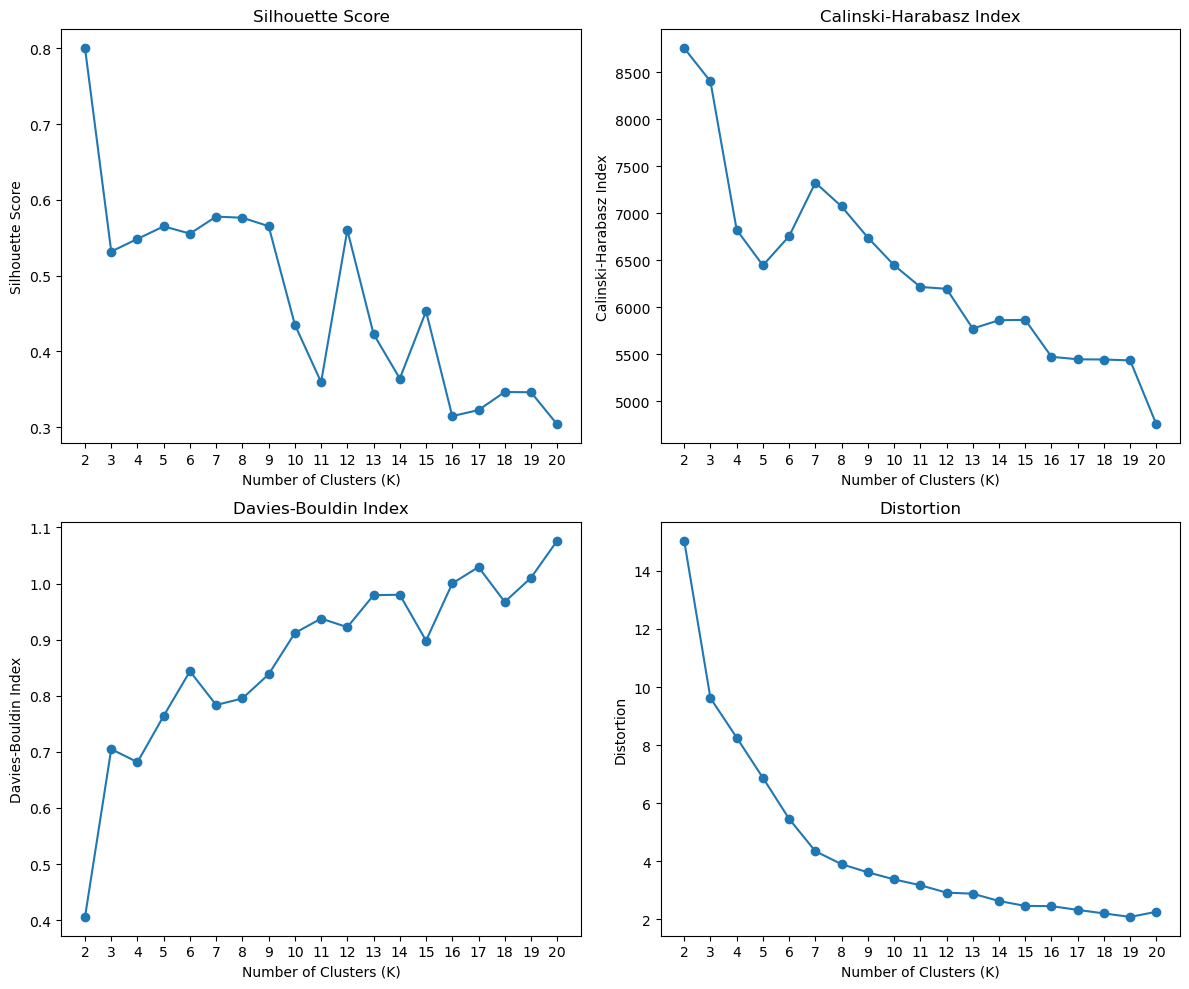

In [60]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
feature = ['Y-axis Angular Velocity', 'X-axis Angle',
       'Z-axis Angular Velocity']
    
RideTrackAnalyzer.determine_optimal_clusters(DataSet[feature], 20, None)

In [62]:
for x in range (10):
    
    DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
    feature = ['Y-axis Angular Velocity', 'X-axis Angle',
       'Z-axis Angular Velocity']
    
    
    now = datetime.now()
    date = now.strftime('%Y%m%d')
    now_time = now.strftime('%H%M%S')  # 格式化時間為HHMMSS，包括秒數
    print(now_time)
    model = f"{date}_model_{now_time}.pkl"
    RideTrackAnalyzer.cluster_data(DataSet, feature, method="kmeans", n_clusters=11, model_path=model, save_path='PCA_RF_3_Angular_Velocity_10_Cluster.csv')
    
    Train_Data = pd.read_csv('PCA_RF_3_Angular_Velocity_10_Cluster.csv')
    Test_Data = pd.read_csv('PCA_RF_3_Angular_Velocity_10_Cluster.csv')

    Train_Label = pd.read_csv('Train_Label.csv')
    Test_Label = pd.read_csv('Test_Label.csv')

    Train_Data['Action'] = Train_Label['Action']
    Test_Data['Action'] = Test_Label['Action']

    RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
    RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
    RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False)

023714
Execution time: 0.0 hours 0.0 minutes 0.5010991096496582 seconds
Execution time: 0.0 hours 0.0 minutes 1.9600012302398682 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 155.88it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    39.473684   82.532751   66.25  97.457627   
1  Filter_Predict  100.0    42.105263   87.772926   73.75  97.457627   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         87.938736  
1       83.060109         90.491385  
023753
Execution time: 0.0 hours 0.0 minutes 0.49496912956237793 seconds
Execution time: 0.0 hours 0.0 minutes 1.9691717624664307 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 155.85it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    51.754386   82.532751   58.75  98.305085   
1  Filter_Predict  100.0    54.385965   87.772926   70.00  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       67.213115         87.874920  
1       69.398907         89.661774  
023831
Execution time: 0.0 hours 0.0 minutes 0.4999721050262451 seconds
Execution time: 0.0 hours 0.0 minutes 1.9339702129364014 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 156.90it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    41.228070   82.532751   66.25   98.305085   
1  Filter_Predict  100.0    45.614035   87.772926   73.75  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.130185  
1       83.060109         90.938098  
023909
Execution time: 0.0 hours 0.0 minutes 0.5229957103729248 seconds
Execution time: 0.0 hours 0.0 minutes 1.9440159797668457 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.58it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    42.105263   82.969432   53.75  90.677966   
1  Filter_Predict  100.0    43.859649   86.026201   53.75  90.677966   

   Two-Stage Left  Accuracy (Total)  
0       69.945355         86.726228  
1       75.409836         87.938736  
023947
Execution time: 0.0 hours 0.0 minutes 0.6109979152679443 seconds
Execution time: 0.0 hours 0.0 minutes 2.012998104095459 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 155.95it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    42.105263   82.096070   53.75  94.067797   
1  Filter_Predict  100.0    44.736842   87.336245   61.25  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       67.213115         86.534780  
1       74.863388         89.087428  
024025
Execution time: 0.0 hours 0.0 minutes 0.6350281238555908 seconds
Execution time: 0.0 hours 0.0 minutes 1.9119694232940674 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 159.49it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    47.368421   82.096070   62.50  97.457627   
1  Filter_Predict  100.0    49.122807   87.336245   63.75  97.457627   

   Two-Stage Left  Accuracy (Total)  
0       73.224044         88.321634  
1       83.060109         90.427569  
024103
Execution time: 0.0 hours 0.0 minutes 0.5100264549255371 seconds
Execution time: 0.0 hours 0.0 minutes 1.9829967021942139 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 157.37it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    42.982456   82.969432   37.50  92.372881   
1  Filter_Predict  100.0    47.368421   87.336245   46.25  94.915254   

   Two-Stage Left  Accuracy (Total)  
0       68.306011         85.896618  
1       65.573770         87.172942  
024141
Execution time: 0.0 hours 0.0 minutes 0.4916563034057617 seconds
Execution time: 0.0 hours 0.0 minutes 1.9150300025939941 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 160.13it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    49.122807   83.406114   63.75  97.457627   
1  Filter_Predict  100.0    51.754386   85.589520   65.00  97.457627   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.640715  
1       82.513661         90.363752  
024218
Execution time: 0.0 hours 0.0 minutes 0.4780275821685791 seconds
Execution time: 0.0 hours 0.0 minutes 1.9344284534454346 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 157.03it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    42.982456   82.532751   36.25      100.0   
1  Filter_Predict  100.0    44.736842   87.336245   35.00      100.0   

   Two-Stage Left  Accuracy (Total)  
0       70.491803         86.598596  
1       68.852459         87.172942  
024256
Execution time: 0.0 hours 0.0 minutes 0.5009994506835938 seconds
Execution time: 0.0 hours 0.0 minutes 2.0180299282073975 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 155.17it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    47.368421   84.279476   30.00      100.0   
1  Filter_Predict  100.0    50.877193   88.209607   23.75      100.0   

   Two-Stage Left  Accuracy (Total)  
0       74.316940         87.300574  
1       73.770492         87.747288  


In [ ]:
#Z-axis Angular Velocity'   31          ###############         
#  'X-axis Angle'            16          ###############
# 'Y-axis Angular Velocity' 


# RF

In [64]:
#case 6
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
feature = ['Y-axis Angular Velocity', 'X-axis Angle', 'Z-axis Angular Velocity']

RideTrackAnalyzer.predict_cluster(DataSet, feature, '20230716_model_023831.pkl', 'Ablation2_case5_RF_10_Cluster.csv')
    
Train_Data = pd.read_csv('Ablation2_case5_RF_10_Cluster.csv')
Test_Data = pd.read_csv('Ablation2_case5_RF_10_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.2740468978881836 seconds
Execution time: 0.0 hours 0.0 minutes 1.9434621334075928 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.16it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    41.228070   82.532751   66.25   98.305085   
1  Filter_Predict  100.0    45.614035   87.772926   73.75  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.130185  
1       83.060109         90.938098  
|    | RideTrack      |   Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|-------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        |    100 |       41.2281 |      82.5328 |    66.25 |     98.3051 |          72.6776 |            88.1302 |
|  1 | Filter_Predict |    100 |       45.614  |      87.7729 |    73.75 |    100      |          83.0601 |            90.9381 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Predicted: Tw

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,52,14,0,0,48,0,45.614035
1,Idle,0,843,0,0,0,0,100.000000
2,Turn Left,0,0,118,0,0,0,100.000000
3,Turn Right,16,7,0,201,5,0,87.772926
4,Two-Stage Left,5,26,0,0,152,0,83.060109
5,U-turn,0,2,0,0,19,59,73.750000


In [ ]:
# 消融實驗第三階段 加入ECU

In [65]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')

ECU_IMU_Feature =['Atmospheric Pressure', 'Ignition Coil Current Diagnosis','Engine Operating Time','Ignition Advance Angle', 'Idling Correction Ignition Angle',
'Fuel Injection Prohibition Mode', 'ABV Opening', 'ABV Idling Correction', 'Air-Fuel Ratio Rich', 'Closed Loop Control', 'Air Flow', 'Throttle Valve Air Flow',
'Intake Manifold Pressure', 'Intake Manifold Front Pressure','Fuel Injection Quantity', 'MFF_WUP_COR','Engine RPM', 'Idling Target RPM','Fuel Injection Start Angle', 
'Engine State','Engine Temperature', 'Ignition Magnetization Time', 'Fuel Injection Time',
'Closed Loop Fuel Correction', 'Intake Temperature', 'Combustion Chamber Intake Temperature', 
'TPS Opening','Battery Voltage', 'O2 Voltage','Vehicle Speed', 'TPS Voltage','X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle'] 

RideTrackAnalyzer.apply_pca(DataSet[ECU_IMU_Feature], None, 'Ablation3_Case_6_ECU_IMU_PCA.pkl')

適合降至10維度
Execution time: 0.0 hours 0.0 minutes 0.014001846313476562 seconds


(array([[-0.72175533, -0.75472538,  1.25867956, ..., -0.09290088,
         -0.05478824, -0.27265761],
        [-0.72131876, -0.75557764,  1.25859012, ..., -0.09411176,
         -0.05477171, -0.2726403 ],
        [-0.73784182, -0.75337718,  1.26438536, ..., -0.13350271,
         -0.06856656, -0.25852562],
        ...,
        [-0.82283337,  0.27746429, -0.62998922, ..., -0.10667745,
         -0.17188394,  0.08243648],
        [-0.77444901,  0.27293347, -0.63940051, ..., -0.12155592,
         -0.14710392,  0.08947501],
        [-0.77388815,  0.27322119, -0.63895874, ..., -0.12254263,
         -0.14642932,  0.08881814]]),
 PCA(n_components=10))

In [66]:
RideTrackAnalyzer.get_feature_weights(DataSet[ECU_IMU_Feature], 'Ablation3_Case_6_ECU_IMU_PCA.pkl')

Execution time: 0.0 hours 0.0 minutes 0.006012916564941406 seconds


,Feature,Weight
6,ABV Opening,0.225785
3,Ignition Advance Angle,0.201540
8,Air-Fuel Ratio Rich,0.198908
11,Throttle Valve Air Flow,0.190134
28,O2 Voltage,0.186247
21,Ignition Magnetization Time,0.171170
19,Engine State,0.165827
25,Combustion Chamber Intake Temperature,0.165186
26,TPS Opening,0.161939
30,TPS Voltage,0.161799


In [68]:
# PCA 選10

PCA_feature_10 = ['ABV Opening', 
'Ignition Advance Angle','Air-Fuel Ratio Rich','Throttle Valve Air Flow','O2 Voltage',
'Ignition Magnetization Time','Engine State',
'Combustion Chamber Intake Temperature',
'TPS Opening',
'TPS Voltage']

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:10<00:00,  1.82it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [15  3  4  6 12  5  9  8  7  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11  5 10  9  6  4  8  7  3  2]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [10 12 11 18 13 14 16 19 17 20]
根據 Distortion，前 10 個建議的分群數量分別為 [19 18 20 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 set()
Execution time: 0.0 hours 0.0 minutes 10.571719884872437 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.800327              8758.490155              0.405761   
 3           0.531811              8405.047888              0.704841   
 4           0.548484              6826.363231              0.681586   
 5           0.565001              6447.656162              0.764228   
 6           0.555472              6758.433054              0.843636   
 7           0.577884              7327.535108              0.783514   
 8           0.576390              7074.238986              0.795172   
 9           0.565291              6743.825443              0.838171   
 10          0.435159              6449.744838              0.911803   
 11          0.359287              6218.490774              0.937549   
 12          0.560143              6198.465590              0.922262   
 13          0.422860              5775.572111              0.979222   
 14          0.364076              5864.290858              0.98

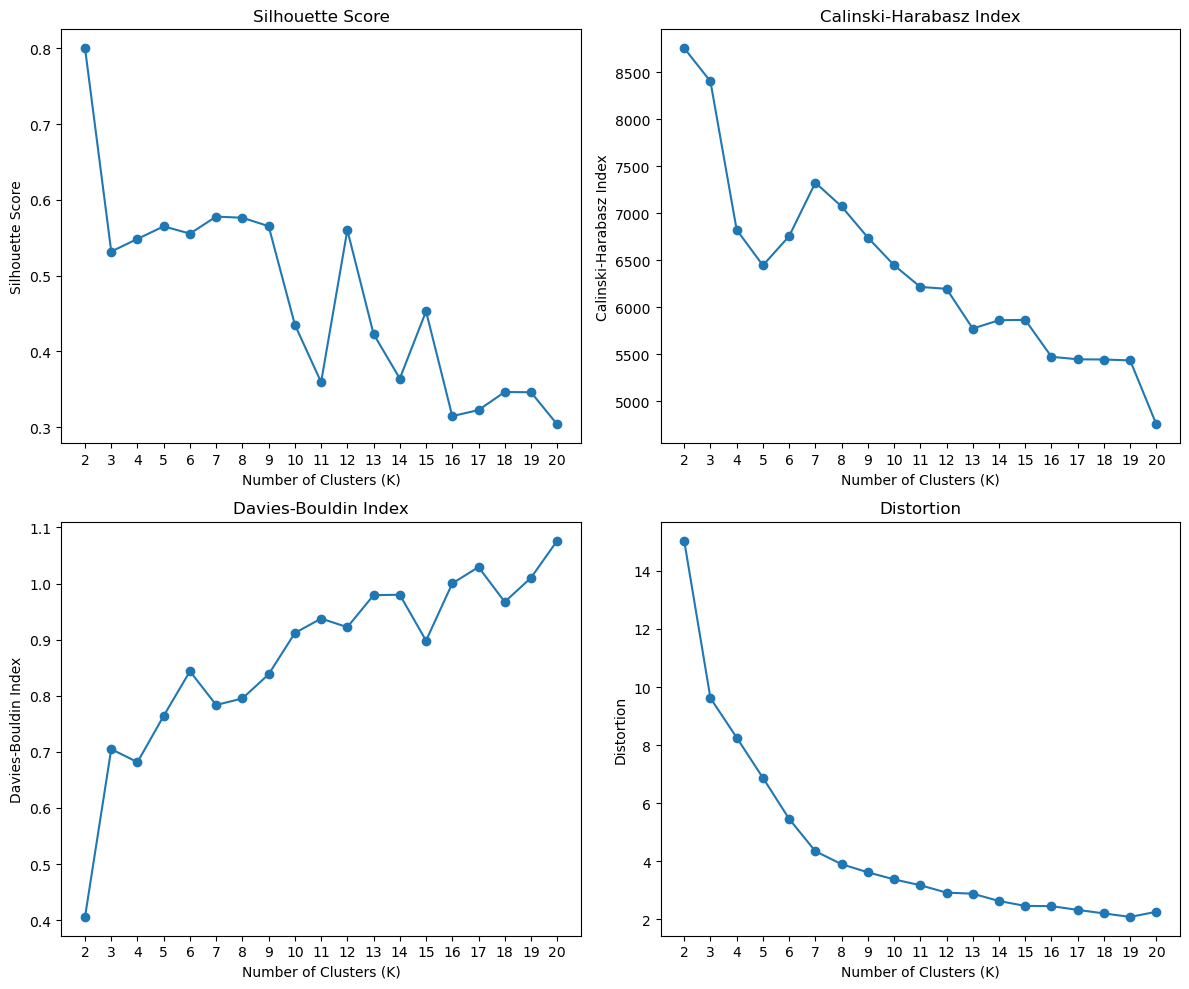

In [67]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
PCA_feature_10 = ['ABV Opening', 
'Ignition Advance Angle','Air-Fuel Ratio Rich','Throttle Valve Air Flow','O2 Voltage',
'Ignition Magnetization Time','Engine State',
'Combustion Chamber Intake Temperature',
'TPS Opening',
'TPS Voltage']
    
RideTrackAnalyzer.determine_optimal_clusters(DataSet[feature], 20, None)

In [69]:
for x in range (10):
    
    DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
    PCA_feature_10 = ['ABV Opening', 'Ignition Advance Angle','Air-Fuel Ratio Rich','Throttle Valve Air Flow','O2 Voltage',
                       'Ignition Magnetization Time','Engine State', 'Combustion Chamber Intake Temperature','TPS Opening','TPS Voltage']
    
    
    now = datetime.now()
    date = now.strftime('%Y%m%d')
    now_time = now.strftime('%H%M%S')  # 格式化時間為HHMMSS，包括秒數
    print(now_time)
    model = f"{date}_model_{now_time}.pkl"
    RideTrackAnalyzer.cluster_data(DataSet, feature, method="kmeans", n_clusters=11, model_path=model, save_path='PCAIMU_PCA_10_11_Cluster.csv')
    
    Train_Data = pd.read_csv('PCAIMU_PCA_10_11_Cluster.csv')
    Test_Data = pd.read_csv('PCAIMU_PCA_10_11_Cluster.csv')

    Train_Label = pd.read_csv('Train_Label.csv')
    Test_Label = pd.read_csv('Test_Label.csv')

    Train_Data['Action'] = Train_Label['Action']
    Test_Data['Action'] = Test_Label['Action']

    RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
    RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
    RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False)

025735
Execution time: 0.0 hours 0.0 minutes 0.5000386238098145 seconds
Execution time: 0.0 hours 0.0 minutes 1.9880282878875732 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.93it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    49.122807   83.406114   63.75   98.305085   
1  Filter_Predict  100.0    51.754386   85.589520   65.00  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.131148         88.640715  
1       82.513661         90.555201  
025812
Execution time: 0.0 hours 0.0 minutes 0.4820258617401123 seconds
Execution time: 0.0 hours 0.0 minutes 1.9269988536834717 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 155.61it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    41.228070   82.532751   66.25   98.305085   
1  Filter_Predict  100.0    45.614035   87.772926   73.75  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.130185  
1       83.060109         90.938098  
025851
Execution time: 0.0 hours 0.0 minutes 0.48200035095214844 seconds
Execution time: 0.0 hours 0.0 minutes 1.9911234378814697 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.33it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    42.105263   84.279476   63.75   98.305085   
1  Filter_Predict  100.0    44.736842   89.519651   65.00  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       70.491803         88.066369  
1       79.781421         90.299936  
025928
Execution time: 0.0 hours 0.0 minutes 0.4999995231628418 seconds
Execution time: 0.0 hours 0.0 minutes 1.9309990406036377 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 156.94it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    42.105263   83.842795   58.75      100.0   
1  Filter_Predict  100.0    48.245614   89.519651   70.00      100.0   

   Two-Stage Left  Accuracy (Total)  
0       65.573770         87.300574  
1       69.398907         89.597958  
030006
Execution time: 0.0 hours 0.0 minutes 0.5080018043518066 seconds
Execution time: 0.0 hours 0.0 minutes 1.9330015182495117 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 156.29it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    39.473684   82.532751   66.25  97.457627   
1  Filter_Predict  100.0    42.105263   87.772926   73.75  97.457627   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         87.938736  
1       83.060109         90.491385  
030045
Execution time: 0.0 hours 0.0 minutes 0.48996734619140625 seconds
Execution time: 0.0 hours 0.0 minutes 1.9850361347198486 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 159.25it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack        Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict   99.762752    51.754386   85.589520   38.75  78.813559   
1  Filter_Predict  100.000000    53.508772   87.772926   46.25  84.745763   

   Two-Stage Left  Accuracy (Total)  
0       68.852459         85.896618  
1       71.038251         87.555839  
030122
Execution time: 0.0 hours 0.0 minutes 0.4910271167755127 seconds
Execution time: 0.0 hours 0.0 minutes 1.911041021347046 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 157.89it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    41.228070   82.969432    35.0  89.830508   
1  Filter_Predict  100.0    42.982456   87.336245    42.5  91.525424   

   Two-Stage Left  Accuracy (Total)  
0       68.852459         85.513720  
1       67.759563         86.662412  
030200
Execution time: 0.0 hours 0.0 minutes 0.4800271987915039 seconds
Execution time: 0.0 hours 0.0 minutes 1.951002836227417 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 154.48it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    49.122807   82.096070    55.0  95.762712   
1  Filter_Predict  100.0    50.000000   86.899563    65.0  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       66.120219         87.109126  
1       69.398907         88.959796  
030239
Execution time: 0.0 hours 0.0 minutes 0.520998477935791 seconds
Execution time: 0.0 hours 0.0 minutes 2.001009225845337 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 159.68it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    42.105263   84.279476   63.75   99.152542   
1  Filter_Predict  100.0    44.736842   89.519651   65.00  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       71.038251         88.194001  
1       83.060109         90.682833  
030316
Execution time: 0.0 hours 0.0 minutes 0.5010297298431396 seconds
Execution time: 0.0 hours 0.0 minutes 1.9872465133666992 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 155.98it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    48.245614   83.406114   37.50  91.525424   
1  Filter_Predict  100.0    50.000000   87.336245   46.25  93.220339   

   Two-Stage Left  Accuracy (Total)  
0       68.306011         86.279515  
1       65.573770         87.236758  


In [70]:
#case 6
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
PCA_feature_10 = ['ABV Opening', 
'Ignition Advance Angle','Air-Fuel Ratio Rich','Throttle Valve Air Flow','O2 Voltage',
'Ignition Magnetization Time','Engine State',
'Combustion Chamber Intake Temperature',
'TPS Opening',
'TPS Voltage']

RideTrackAnalyzer.predict_cluster(DataSet, feature, '20230716_model_025812.pkl', 'Ablation3_case3_11_Cluster.csv')
    
Train_Data = pd.read_csv('Ablation3_case3_11_Cluster.csv')
Test_Data = pd.read_csv('Ablation3_case3_11_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.28289794921875 seconds
Execution time: 0.0 hours 0.0 minutes 2.0340418815612793 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 155.65it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    41.228070   82.532751   66.25   98.305085   
1  Filter_Predict  100.0    45.614035   87.772926   73.75  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.130185  
1       83.060109         90.938098  
|    | RideTrack      |   Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|-------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        |    100 |       41.2281 |      82.5328 |    66.25 |     98.3051 |          72.6776 |            88.1302 |
|  1 | Filter_Predict |    100 |       45.614  |      87.7729 |    73.75 |    100      |          83.0601 |            90.9381 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Predicted: Tw

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,52,14,0,0,48,0,45.614035
1,Idle,0,843,0,0,0,0,100.000000
2,Turn Left,0,0,118,0,0,0,100.000000
3,Turn Right,16,7,0,201,5,0,87.772926
4,Two-Stage Left,5,26,0,0,152,0,83.060109
5,U-turn,0,2,0,0,19,59,73.750000


In [ ]:
# 用隨機森林挑特徵

In [74]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')

ECU_IMU_Feature =['Atmospheric Pressure', 'Ignition Coil Current Diagnosis','Engine Operating Time','Ignition Advance Angle', 'Idling Correction Ignition Angle',
'Fuel Injection Prohibition Mode', 'ABV Opening', 'ABV Idling Correction', 'Air-Fuel Ratio Rich', 'Closed Loop Control', 'Air Flow', 'Throttle Valve Air Flow',
'Intake Manifold Pressure', 'Intake Manifold Front Pressure','Fuel Injection Quantity', 'MFF_WUP_COR','Engine RPM', 'Idling Target RPM','Fuel Injection Start Angle', 
'Engine State','Engine Temperature', 'Ignition Magnetization Time', 'Fuel Injection Time',
'Closed Loop Fuel Correction', 'Intake Temperature', 'Combustion Chamber Intake Temperature', 
'TPS Opening','Battery Voltage', 'O2 Voltage','Vehicle Speed', 'TPS Voltage','X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle'] 


Total_Label = pd.read_csv('Total_Label.csv') 
DataSet['Action'] = Total_Label['Action']
DataSet = DataSet.dropna()

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(DataSet[ECU_IMU_Feature], DataSet['Action'])
feature_importances = clf.feature_importances_
feature_importances

array([0.01893649, 0.04168125, 0.00561891, 0.0256111 , 0.00228627,
       0.0012494 , 0.01434261, 0.00360986, 0.00179554, 0.01840341,
       0.02031478, 0.0315594 , 0.02065611, 0.02312663, 0.01831382,
       0.00236111, 0.07399515, 0.01129795, 0.02199588, 0.01361445,
       0.00929457, 0.04097476, 0.01619523, 0.09444194, 0.00699462,
       0.00939659, 0.02259124, 0.0089484 , 0.0461336 , 0.07790163,
       0.02825522, 0.0491854 , 0.04395429, 0.09666936, 0.01341003,
       0.00603106, 0.00654815, 0.04057052, 0.00581957, 0.00591367])

In [79]:
RF_10 = ['Ignition Coil Current Diagnosis','Engine RPM', 'Ignition Magnetization Time', 'Closed Loop Fuel Correction',
 'O2 Voltage','Vehicle Speed', 'X-axis Angular Velocity', 'Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Angle'] 

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:10<00:00,  1.83it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [15  3  4  6 12  5  9  8  7  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11  5 10  9  6  4  8  7  3  2]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [10 12 11 18 13 14 16 19 17 20]
根據 Distortion，前 10 個建議的分群數量分別為 [19 18 20 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 set()
Execution time: 0.0 hours 0.0 minutes 10.540655612945557 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.800327              8758.490155              0.405761   
 3           0.531811              8405.047888              0.704841   
 4           0.548484              6826.363231              0.681586   
 5           0.565001              6447.656162              0.764228   
 6           0.555472              6758.433054              0.843636   
 7           0.577884              7327.535108              0.783514   
 8           0.576390              7074.238986              0.795172   
 9           0.565291              6743.825443              0.838171   
 10          0.435159              6449.744838              0.911803   
 11          0.359287              6218.490774              0.937549   
 12          0.560143              6198.465590              0.922262   
 13          0.422860              5775.572111              0.979222   
 14          0.364076              5864.290858              0.98

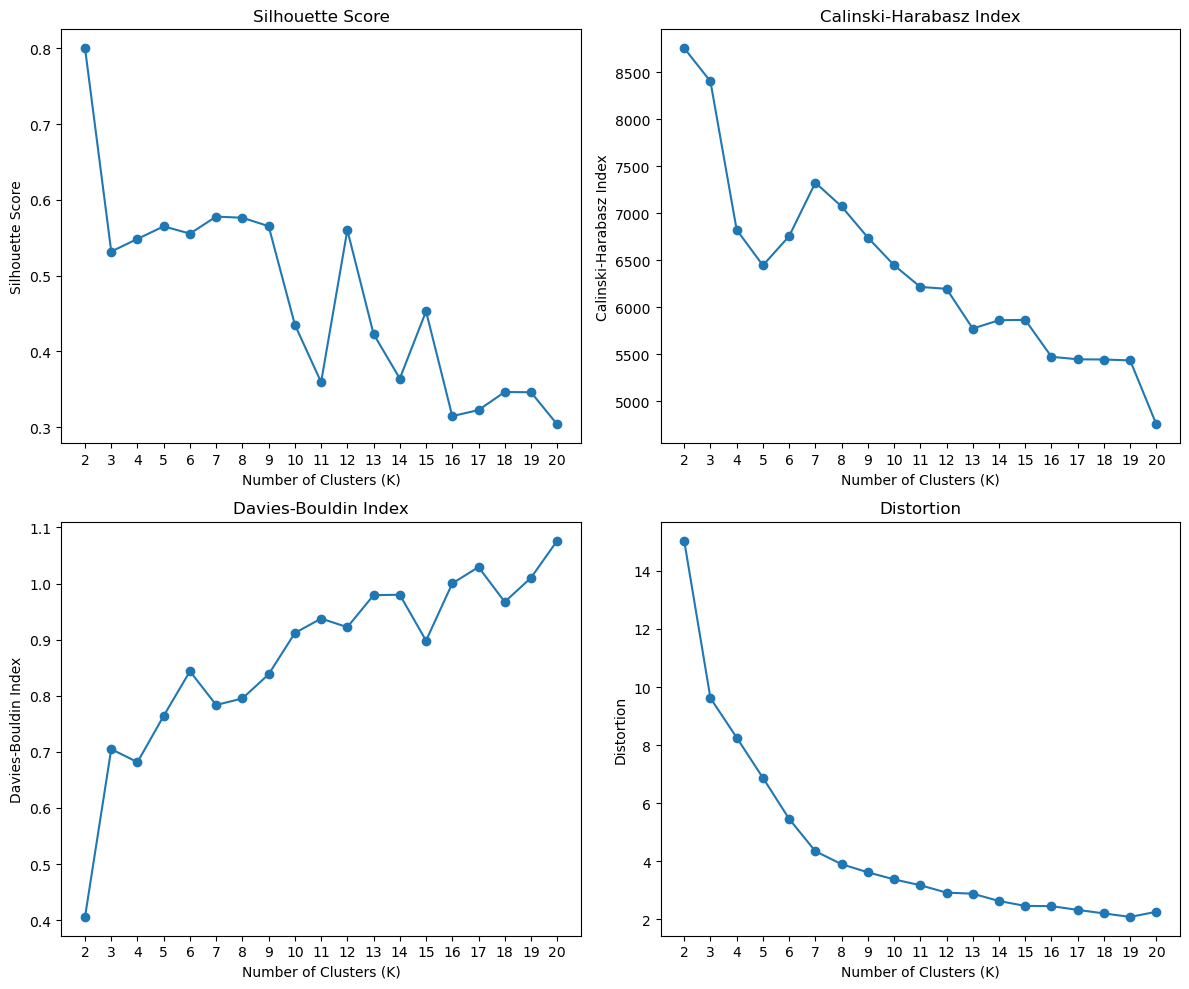

In [80]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
RF_10 =['Ignition Coil Current Diagnosis','Engine RPM', 'Ignition Magnetization Time', 'Closed Loop Fuel Correction',
 'O2 Voltage','Vehicle Speed', 'X-axis Angular Velocity', 'Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Angle'] 
RideTrackAnalyzer.determine_optimal_clusters(DataSet[feature], 20, None)

In [81]:
for x in range (10):
    
    DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
    RF_10 = ['Ignition Coil Current Diagnosis','Engine RPM', 'Ignition Magnetization Time', 'Closed Loop Fuel Correction',
 'O2 Voltage','Vehicle Speed', 'X-axis Angular Velocity', 'Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Angle'] 
    
    
    now = datetime.now()
    date = now.strftime('%Y%m%d')
    now_time = now.strftime('%H%M%S')  # 格式化時間為HHMMSS，包括秒數
    print(now_time)
    model = f"{date}_model_{now_time}.pkl"
    RideTrackAnalyzer.cluster_data(DataSet, feature, method="kmeans", n_clusters=11, model_path=model, save_path='PCAIMU_RF_10_11_Cluster.csv')
    
    Train_Data = pd.read_csv('PCAIMU_RF_10_11_Cluster.csv')
    Test_Data = pd.read_csv('PCAIMU_RF_10_11_Cluster.csv')

    Train_Label = pd.read_csv('Train_Label.csv')
    Test_Label = pd.read_csv('Test_Label.csv')

    Train_Data['Action'] = Train_Label['Action']
    Test_Data['Action'] = Test_Label['Action']

    RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
    RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
    RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False)

033543
Execution time: 0.0 hours 0.0 minutes 0.49503064155578613 seconds
Execution time: 0.0 hours 0.0 minutes 1.9389994144439697 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.77it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    41.228070   82.532751   66.25   98.305085   
1  Filter_Predict  100.0    45.614035   87.772926   73.75  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.130185  
1       83.060109         90.938098  
033621
Execution time: 0.0 hours 0.0 minutes 0.48399901390075684 seconds
Execution time: 0.0 hours 0.0 minutes 1.971999168395996 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.79it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    39.473684   82.532751   66.25  97.457627   
1  Filter_Predict  100.0    42.105263   87.772926   73.75  97.457627   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         87.938736  
1       83.060109         90.491385  
033659
Execution time: 0.0 hours 0.0 minutes 0.47899842262268066 seconds
Execution time: 0.0 hours 0.0 minutes 1.9081497192382812 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 156.33it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    40.350877   82.532751    65.0      100.0   
1  Filter_Predict  100.0    44.736842   88.209607    75.0      100.0   

   Two-Stage Left  Accuracy (Total)  
0       67.213115         87.492023  
1       69.945355         89.470325  
033737
Execution time: 0.0 hours 0.0 minutes 0.48799896240234375 seconds
Execution time: 0.0 hours 0.0 minutes 1.9080328941345215 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.42it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    49.122807   82.096070   55.00  94.067797   
1  Filter_Predict  100.0    50.000000   86.899563   63.75  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       68.852459         87.300574  
1       75.409836         89.597958  
033815
Execution time: 0.0 hours 0.0 minutes 0.49303102493286133 seconds
Execution time: 0.0 hours 0.0 minutes 1.9932012557983398 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 157.34it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    50.000000   82.969432   36.25   99.152542   
1  Filter_Predict  100.0    51.754386   87.336245   37.50  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       68.306011         86.853861  
1       65.573770         87.428207  
033853
Execution time: 0.0 hours 0.0 minutes 0.4799940586090088 seconds
Execution time: 0.0 hours 0.0 minutes 1.9090030193328857 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 155.48it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    37.719298   83.406114   66.25  97.457627   
1  Filter_Predict  100.0    40.350877   89.082969   73.75  97.457627   

   Two-Stage Left  Accuracy (Total)  
0       71.584699         87.811104  
1       83.606557         90.619017  
033931
Execution time: 0.0 hours 0.0 minutes 0.4889993667602539 seconds
Execution time: 0.0 hours 0.0 minutes 1.9990832805633545 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 157.24it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    47.368421   83.406114   58.75      100.0   
1  Filter_Predict  100.0    54.385965   87.336245   70.00      100.0   

   Two-Stage Left  Accuracy (Total)  
0       65.573770         87.619655  
1       69.398907         89.725590  
034009
Execution time: 0.0 hours 0.0 minutes 0.5039722919464111 seconds
Execution time: 0.0 hours 0.0 minutes 1.943176031112671 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 157.18it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    44.736842   84.716157    52.5  90.677966   
1  Filter_Predict  100.0    52.631579   87.772926    60.0  90.677966   

   Two-Stage Left  Accuracy (Total)  
0       67.213115         86.790045  
1       72.131148         88.768347  
034047
Execution time: 0.0 hours 0.0 minutes 0.49199962615966797 seconds
Execution time: 0.0 hours 0.0 minutes 1.9219696521759033 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.60it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    47.368421   82.969432   58.75      100.0   
1  Filter_Predict  100.0    54.385965   87.336245   70.00      100.0   

   Two-Stage Left  Accuracy (Total)  
0       66.120219         87.619655  
1       69.398907         89.725590  
034125
Execution time: 0.0 hours 0.0 minutes 0.48400020599365234 seconds
Execution time: 0.0 hours 0.0 minutes 1.9850261211395264 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 157.72it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    39.473684   82.532751   66.25  97.457627   
1  Filter_Predict  100.0    42.105263   87.772926   73.75  97.457627   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         87.938736  
1       83.060109         90.491385  


In [82]:
#case 6
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
RF_10 = ['Ignition Coil Current Diagnosis','Engine RPM', 'Ignition Magnetization Time', 'Closed Loop Fuel Correction',
 'O2 Voltage','Vehicle Speed', 'X-axis Angular Velocity', 'Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Angle'] 

RideTrackAnalyzer.predict_cluster(DataSet, feature, '20230716_model_033543.pkl', 'Ablation3_case3_RF10_11_Cluster.csv')
    
Train_Data = pd.read_csv('Ablation3_case3_RF10_11_Cluster.csv')
Test_Data = pd.read_csv('Ablation3_case3_RF10_11_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.283998966217041 seconds
Execution time: 0.0 hours 0.0 minutes 1.9292283058166504 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 159.25it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    41.228070   82.532751   66.25   98.305085   
1  Filter_Predict  100.0    45.614035   87.772926   73.75  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.130185  
1       83.060109         90.938098  
|    | RideTrack      |   Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|-------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        |    100 |       41.2281 |      82.5328 |    66.25 |     98.3051 |          72.6776 |            88.1302 |
|  1 | Filter_Predict |    100 |       45.614  |      87.7729 |    73.75 |    100      |          83.0601 |            90.9381 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Predicted: Tw

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,52,14,0,0,48,0,45.614035
1,Idle,0,843,0,0,0,0,100.000000
2,Turn Left,0,0,118,0,0,0,100.000000
3,Turn Right,16,7,0,201,5,0,87.772926
4,Two-Stage Left,5,26,0,0,152,0,83.060109
5,U-turn,0,2,0,0,19,59,73.750000


In [83]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')

ECU_IMU_Feature =['Atmospheric Pressure', 'Ignition Coil Current Diagnosis','Engine Operating Time','Ignition Advance Angle', 'Idling Correction Ignition Angle',
'Fuel Injection Prohibition Mode', 'ABV Opening', 'ABV Idling Correction', 'Air-Fuel Ratio Rich', 'Closed Loop Control', 'Air Flow', 'Throttle Valve Air Flow',
'Intake Manifold Pressure', 'Intake Manifold Front Pressure','Fuel Injection Quantity', 'MFF_WUP_COR','Engine RPM', 'Idling Target RPM','Fuel Injection Start Angle', 
'Engine State','Engine Temperature', 'Ignition Magnetization Time', 'Fuel Injection Time',
'Closed Loop Fuel Correction', 'Intake Temperature', 'Combustion Chamber Intake Temperature', 
'TPS Opening','Battery Voltage', 'O2 Voltage','Vehicle Speed', 'TPS Voltage'] 


Total_Label = pd.read_csv('Total_Label.csv') 
DataSet['Action'] = Total_Label['Action']
DataSet = DataSet.dropna()

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(DataSet[ECU_IMU_Feature], DataSet['Action'])
feature_importances = clf.feature_importances_
feature_importances

array([0.03504061, 0.02958131, 0.01331315, 0.027485  , 0.00225247,
       0.00130124, 0.02162192, 0.00567279, 0.00191992, 0.02151031,
       0.03621182, 0.0415332 , 0.03719271, 0.0306477 , 0.03200777,
       0.00615921, 0.09470859, 0.02266528, 0.02787561, 0.0119022 ,
       0.02507135, 0.03985973, 0.03121327, 0.11237671, 0.01343052,
       0.01898045, 0.03272458, 0.01738578, 0.05979239, 0.11712746,
       0.03143494])

In [ ]:
# [
# 'Engine RPM',
# ,'Closed Loop Fuel Correction', 
#  'O2 Voltage','Vehicle Speed', 
# ] 

In [ ]:
['Atmospheric Pressure', 'Ignition Coil Current Diagnosis','Engine Operating Time','Ignition Advance Angle', 'Idling Correction Ignition Angle',
'Fuel Injection Prohibition Mode', 'ABV Opening', 'ABV Idling Correction', 'Air-Fuel Ratio Rich', 'Closed Loop Control', 
'Air Flow', 'Throttle Valve Air Flow','Intake Manifold Pressure', 'Intake Manifold Front Pressure','Fuel Injection Quantity', 
'MFF_WUP_COR','Engine RPM', 'Idling Target RPM','Fuel Injection Start Angle', 'Engine State',
'Engine Temperature', 'Ignition Magnetization Time', 'Fuel Injection Time','Closed Loop Fuel Correction', 'Intake Temperature', 
'Combustion Chamber Intake Temperature', 'TPS Opening','Battery Voltage', 'O2 Voltage','Vehicle Speed', 
'TPS Voltage'] 

In [ ]:
['Fuel Injection Prohibition Mode', 'ABV Opening', 'ABV Idling Correction',
 'Throttle Valve Air Flow',
 'Engine RPM',
 'O2 Voltage','Vehicle Speed', 
 

In [ ]:
# IMU 3  +ECU 7

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:10<00:00,  1.82it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [15  3  4  6 12  5  9  8  7  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11  5 10  9  6  4  8  7  3  2]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [10 12 11 18 13 14 16 19 17 20]
根據 Distortion，前 10 個建議的分群數量分別為 [19 18 20 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 set()
Execution time: 0.0 hours 0.0 minutes 10.572370767593384 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.800327              8758.490155              0.405761   
 3           0.531811              8405.047888              0.704841   
 4           0.548484              6826.363231              0.681586   
 5           0.565001              6447.656162              0.764228   
 6           0.555472              6758.433054              0.843636   
 7           0.577884              7327.535108              0.783514   
 8           0.576390              7074.238986              0.795172   
 9           0.565291              6743.825443              0.838171   
 10          0.435159              6449.744838              0.911803   
 11          0.359287              6218.490774              0.937549   
 12          0.560143              6198.465590              0.922262   
 13          0.422860              5775.572111              0.979222   
 14          0.364076              5864.290858              0.98

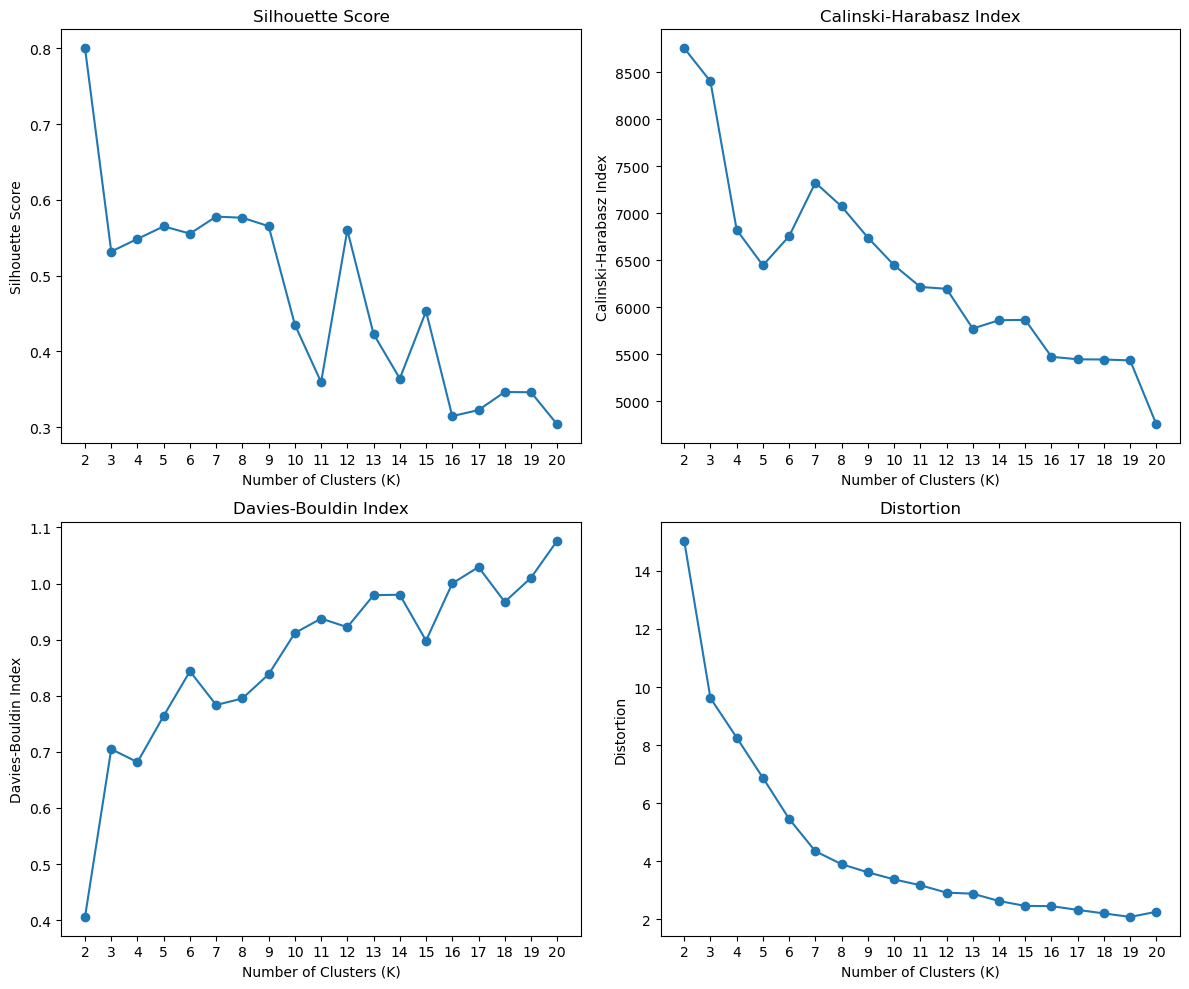

In [84]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
RF_10 =['Z-axis Angular Velocity','X-axis Angle', 'X-axis Angular Velocity', 'Fuel Injection Prohibition Mode', 'ABV Opening', 'ABV Idling Correction',
 'Throttle Valve Air Flow',
 'Engine RPM',
 'O2 Voltage','Vehicle Speed'] 

RideTrackAnalyzer.determine_optimal_clusters(DataSet[feature], 20, None)

In [85]:
for x in range (10):
    
    DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
    RF_10 =['Z-axis Angular Velocity','X-axis Angle', 'X-axis Angular Velocity', 'Fuel Injection Prohibition Mode', 'ABV Opening', 'ABV Idling Correction',
 'Throttle Valve Air Flow',
 'Engine RPM',
 'O2 Voltage','Vehicle Speed'] 
    
    
    now = datetime.now()
    date = now.strftime('%Y%m%d')
    now_time = now.strftime('%H%M%S')  # 格式化時間為HHMMSS，包括秒數
    print(now_time)
    model = f"{date}_model_{now_time}.pkl"
    RideTrackAnalyzer.cluster_data(DataSet, feature, method="kmeans", n_clusters=11, model_path=model, save_path='PCA3IMU7_RF_10_11_Cluster.csv')
    
    Train_Data = pd.read_csv('PCA3IMU7_RF_10_11_Cluster.csv')
    Test_Data = pd.read_csv('PCA3IMU7_RF_10_11_Cluster.csv')

    Train_Label = pd.read_csv('Train_Label.csv')
    Test_Label = pd.read_csv('Test_Label.csv')

    Train_Data['Action'] = Train_Label['Action']
    Test_Data['Action'] = Test_Label['Action']

    RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
    RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
    RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False)

035657
Execution time: 0.0 hours 0.0 minutes 0.5168781280517578 seconds
Execution time: 0.0 hours 0.0 minutes 1.9921815395355225 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.29it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    42.105263   83.406114    35.0  87.288136   
1  Filter_Predict  100.0    46.491228   89.519651    42.5  90.677966   

   Two-Stage Left  Accuracy (Total)  
0       69.945355         85.577537  
1       68.852459         87.300574  
035735
Execution time: 0.0 hours 0.0 minutes 0.48799896240234375 seconds
Execution time: 0.0 hours 0.0 minutes 1.924001693725586 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 157.46it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    44.736842   82.532751   53.75   95.762712   
1  Filter_Predict  100.0    50.877193   86.899563   61.25  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       67.759563         86.981493  
1       74.863388         89.597958  
035813
Execution time: 0.0 hours 0.0 minutes 0.4939994812011719 seconds
Execution time: 0.0 hours 0.0 minutes 1.9190020561218262 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 156.67it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    49.122807   83.406114   37.50  91.525424   
1  Filter_Predict  100.0    50.877193   87.336245   46.25  93.220339   

   Two-Stage Left  Accuracy (Total)  
0       68.306011         86.343331  
1       65.573770         87.300574  
035851
Execution time: 0.0 hours 0.0 minutes 0.49703431129455566 seconds
Execution time: 0.0 hours 0.0 minutes 1.958963394165039 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 159.01it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    41.228070   82.532751   66.25   98.305085   
1  Filter_Predict  100.0    45.614035   87.772926   73.75  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.130185  
1       83.060109         90.938098  
035928
Execution time: 0.0 hours 0.0 minutes 0.48203039169311523 seconds
Execution time: 0.0 hours 0.0 minutes 1.9259984493255615 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.11it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack        Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict   99.762752    51.754386   85.589520   40.00  79.661017   
1  Filter_Predict  100.000000    53.508772   88.209607   46.25  88.135593   

   Two-Stage Left  Accuracy (Total)  
0       69.945355         86.151883  
1       71.038251         87.874920  
040006
Execution time: 0.0 hours 0.0 minutes 0.5020365715026855 seconds
Execution time: 0.0 hours 0.0 minutes 1.9221265316009521 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.30it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    41.228070   82.532751   66.25   98.305085   
1  Filter_Predict  100.0    45.614035   87.772926   73.75  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.130185  
1       83.060109         90.938098  
040044
Execution time: 0.0 hours 0.0 minutes 0.4890282154083252 seconds
Execution time: 0.0 hours 0.0 minutes 1.9749987125396729 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 155.43it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    45.614035   82.096070   53.75  94.067797   
1  Filter_Predict  100.0    46.491228   86.899563   61.25  98.305085   

   Two-Stage Left  Accuracy (Total)  
0       68.852459         86.981493  
1       74.863388         89.151244  
040122
Execution time: 0.0 hours 0.0 minutes 0.4960000514984131 seconds
Execution time: 0.0 hours 0.0 minutes 1.9049994945526123 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.87it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    45.614035   83.406114    65.0      100.0   
1  Filter_Predict  100.0    50.000000   89.082969    75.0      100.0   

   Two-Stage Left  Accuracy (Total)  
0       66.666667         87.938736  
1       69.945355         89.980855  
040200
Execution time: 0.0 hours 0.0 minutes 0.4810006618499756 seconds
Execution time: 0.0 hours 0.0 minutes 1.9612932205200195 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 157.30it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    41.228070   82.532751   66.25   98.305085   
1  Filter_Predict  100.0    45.614035   87.772926   73.75  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.130185  
1       83.060109         90.938098  
040238
Execution time: 0.0 hours 0.0 minutes 0.4779994487762451 seconds
Execution time: 0.0 hours 0.0 minutes 1.9159982204437256 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 156.53it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    47.368421   82.969432    57.5   99.152542   
1  Filter_Predict  100.0    54.385965   87.336245    70.0  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       66.666667         87.555839  
1       69.945355         89.789407  


In [86]:
#case 6
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
RF_10 =['Z-axis Angular Velocity','X-axis Angle', 'X-axis Angular Velocity', 'Fuel Injection Prohibition Mode', 'ABV Opening', 'ABV Idling Correction',
 'Throttle Valve Air Flow','Engine RPM','O2 Voltage','Vehicle Speed'] 
    

RideTrackAnalyzer.predict_cluster(DataSet, feature, '20230716_model_040200.pkl', 'Ablation3_case2_IMU3ECU7_11_Cluster.csv')
    
Train_Data = pd.read_csv('Ablation3_case2_IMU3ECU7_11_Cluster.csv')
Test_Data = pd.read_csv('Ablation3_case2_IMU3ECU7_11_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.28154897689819336 seconds
Execution time: 0.0 hours 0.0 minutes 1.9249992370605469 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 156.32it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    41.228070   82.532751   66.25   98.305085   
1  Filter_Predict  100.0    45.614035   87.772926   73.75  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.130185  
1       83.060109         90.938098  
|    | RideTrack      |   Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|-------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        |    100 |       41.2281 |      82.5328 |    66.25 |     98.3051 |          72.6776 |            88.1302 |
|  1 | Filter_Predict |    100 |       45.614  |      87.7729 |    73.75 |    100      |          83.0601 |            90.9381 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Predicted: Tw

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,52,14,0,0,48,0,45.614035
1,Idle,0,843,0,0,0,0,100.000000
2,Turn Left,0,0,118,0,0,0,100.000000
3,Turn Right,16,7,0,201,5,0,87.772926
4,Two-Stage Left,5,26,0,0,152,0,83.060109
5,U-turn,0,2,0,0,19,59,73.750000


In [ ]:
# IMU 6 ECU 4

In [ ]:
# IMU 6
# Z-axis Angular Velocity  32
# X-axis Angle             16
# X-axis Angular Velocity  10
# Y-axis Angular Velocity  10
# X-axis Acceleration       9
# Y-axis Angle             8.5

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:10<00:00,  1.80it/s]

根據 Silhouette Score，前 10 個建議的分群數量分別為 [15  3  4  6 12  5  9  8  7  2]
根據 Calinski-Harabasz Index，前 10 個建議的分群數量分別為 [11  5 10  9  6  4  8  7  3  2]
根據 Davies-Bouldin Index，前 10 個建議的分群數量分別為 [10 12 11 18 13 14 16 19 17 20]
根據 Distortion，前 10 個建議的分群數量分別為 [19 18 20 17 16 15 14 13 12 11]
根據前三個評分標準推薦的分群數交集為 set()
Execution time: 0.0 hours 0.0 minutes 10.68300485610962 seconds


(    Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
 2           0.800327              8758.490155              0.405761   
 3           0.531811              8405.047888              0.704841   
 4           0.548484              6826.363231              0.681586   
 5           0.565001              6447.656162              0.764228   
 6           0.555472              6758.433054              0.843636   
 7           0.577884              7327.535108              0.783514   
 8           0.576390              7074.238986              0.795172   
 9           0.565291              6743.825443              0.838171   
 10          0.435159              6449.744838              0.911803   
 11          0.359287              6218.490774              0.937549   
 12          0.560143              6198.465590              0.922262   
 13          0.422860              5775.572111              0.979222   
 14          0.364076              5864.290858              0.98

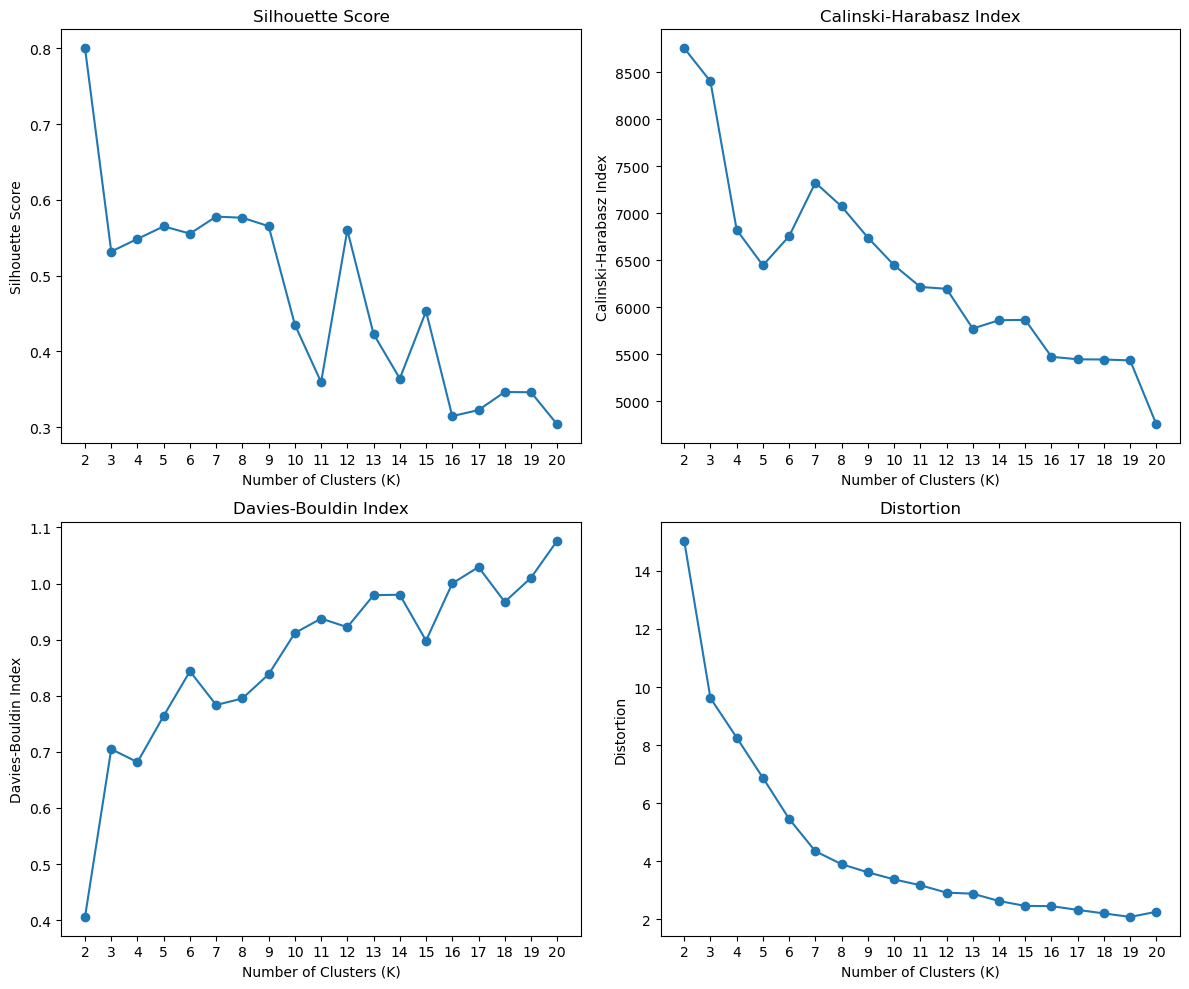

In [87]:
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
IMU6ECU10 = ['Engine RPM','Closed Loop Fuel Correction', 'O2 Voltage','Vehicle Speed', 'Z-axis Angular Velocity', 
'X-axis Angle', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Angle']

RideTrackAnalyzer.determine_optimal_clusters(DataSet[feature], 20, None)

In [88]:
for x in range (10):
    
    DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
    IMU6ECU10 = ['Engine RPM','Closed Loop Fuel Correction', 'O2 Voltage','Vehicle Speed', 'Z-axis Angular Velocity', 
           'X-axis Angle', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Angle']
    
    
    now = datetime.now()
    date = now.strftime('%Y%m%d')
    now_time = now.strftime('%H%M%S')  # 格式化時間為HHMMSS，包括秒數
    print(now_time)
    model = f"{date}_model_{now_time}.pkl"
    RideTrackAnalyzer.cluster_data(DataSet, feature, method="kmeans", n_clusters=11, model_path=model, save_path='PCA3IMU7_RF_10_11_Cluster.csv')
    
    Train_Data = pd.read_csv('PCA3IMU7_RF_10_11_Cluster.csv')
    Test_Data = pd.read_csv('PCA3IMU7_RF_10_11_Cluster.csv')

    Train_Label = pd.read_csv('Train_Label.csv')
    Test_Label = pd.read_csv('Test_Label.csv')

    Train_Data['Action'] = Train_Label['Action']
    Test_Data['Action'] = Test_Label['Action']

    RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
    RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
    RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False)

041325
Execution time: 0.0 hours 0.0 minutes 0.5100317001342773 seconds
Execution time: 0.0 hours 0.0 minutes 1.9409711360931396 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 159.89it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    47.368421   82.969432   63.75   98.305085   
1  Filter_Predict  100.0    51.754386   85.589520   65.00  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.131148         88.449266  
1       82.513661         90.555201  
041403
Execution time: 0.0 hours 0.0 minutes 0.5000331401824951 seconds
Execution time: 0.0 hours 0.0 minutes 1.9180314540863037 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 158.93it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    39.473684   82.532751   66.25  97.457627   
1  Filter_Predict  100.0    42.105263   87.772926   73.75  97.457627   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         87.938736  
1       83.060109         90.491385  
041440
Execution time: 0.0 hours 0.0 minutes 0.4910292625427246 seconds
Execution time: 0.0 hours 0.0 minutes 1.9440279006958008 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 157.99it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    42.982456   82.532751   66.25   97.457627   
1  Filter_Predict  100.0    47.368421   88.209607   75.00  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       68.852459         87.747288  
1       70.491803         89.725590  
041518
Execution time: 0.0 hours 0.0 minutes 0.48197221755981445 seconds
Execution time: 0.0 hours 0.0 minutes 1.891998529434204 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 159.29it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    42.105263   83.406114   66.25  97.457627   
1  Filter_Predict  100.0    46.491228   89.082969   73.75  97.457627   

   Two-Stage Left  Accuracy (Total)  
0       71.584699         88.130185  
1       83.060109         91.001914  
041556
Execution time: 0.0 hours 0.0 minutes 0.49903011322021484 seconds
Execution time: 0.0 hours 0.0 minutes 1.9530017375946045 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:34<00:00, 159.14it/s]


預測所花費時間：0小時0分鐘34秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    42.982456   81.659389   53.75   96.610169   
1  Filter_Predict  100.0    44.736842   86.462882   61.25  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       67.213115         86.726228  
1       74.316940         89.023612  
041633
Execution time: 0.0 hours 0.0 minutes 0.48403072357177734 seconds
Execution time: 0.0 hours 0.0 minutes 1.8899977207183838 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 156.42it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    36.842105   82.532751    65.0      100.0   
1  Filter_Predict  100.0    39.473684   88.209607    75.0      100.0   

   Two-Stage Left  Accuracy (Total)  
0       67.213115         87.236758  
1       69.398907         89.023612  
041711
Execution time: 0.0 hours 0.0 minutes 0.48999691009521484 seconds
Execution time: 0.0 hours 0.0 minutes 1.9212656021118164 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 156.75it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    43.859649   84.716157    52.5      100.0   
1  Filter_Predict  100.0    45.614035   88.646288    60.0      100.0   

   Two-Stage Left  Accuracy (Total)  
0       71.584699         87.938736  
1       75.409836         89.470325  
041749
Execution time: 0.0 hours 0.0 minutes 0.5090174674987793 seconds
Execution time: 0.0 hours 0.0 minutes 2.0347776412963867 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 155.28it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    42.982456   82.969432   33.75      100.0   
1  Filter_Predict  100.0    44.736842   87.336245   32.50      100.0   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         86.790045  
1       72.131148         87.428207  
041828
Execution time: 0.0 hours 0.0 minutes 0.5171327590942383 seconds
Execution time: 0.0 hours 0.0 minutes 1.9428913593292236 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 154.64it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    47.368421   83.406114    57.5   99.152542   
1  Filter_Predict  100.0    54.385965   87.336245    70.0  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       66.120219         87.555839  
1       69.945355         89.789407  
041907
Execution time: 0.0 hours 0.0 minutes 0.5009984970092773 seconds
Execution time: 0.0 hours 0.0 minutes 2.0412163734436035 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 155.33it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn   Turn Left  \
0         Predict  100.0    41.228070   82.532751   66.25   98.305085   
1  Filter_Predict  100.0    45.614035   87.772926   73.75  100.000000   

   Two-Stage Left  Accuracy (Total)  
0       72.677596         88.130185  
1       83.060109         90.938098  


In [89]:
#case 6
DataSet = pd.read_csv('Correction_Normalization_Kalman_Downsample_F6.csv')
    
IMU6ECU10 = ['Engine RPM','Closed Loop Fuel Correction', 'O2 Voltage','Vehicle Speed', 'Z-axis Angular Velocity', 
           'X-axis Angle', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Angle']
    

RideTrackAnalyzer.predict_cluster(DataSet, feature, '20230716_model_041518.pkl', 'Ablation3_case2_IMU6ECU4_11_Cluster.csv')
    
Train_Data = pd.read_csv('Ablation3_case2_IMU6ECU4_11_Cluster.csv')
Test_Data = pd.read_csv('Ablation3_case2_IMU6ECU4_11_Cluster.csv')

Train_Label = pd.read_csv('Train_Label.csv')
Test_Label = pd.read_csv('Test_Label.csv')

Train_Data['Action'] = Train_Label['Action']
Test_Data['Action'] = Test_Label['Action']

RideTrackAnalyzer.Train_Vomm(Train_Data, 30, 11, False)
RideTrackAnalyzer.Test_Vomm(Test_Data, 6, False)
print(RideTrackAnalyzer.Compute_Accuracy(Test_Data, 6, False).to_markdown())
Test_Data = Test_Data.dropna()
RideTrackAnalyzer.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'])

Execution time: 0.0 hours 0.0 minutes 0.2910287380218506 seconds
Execution time: 0.0 hours 0.0 minutes 1.9649598598480225 seconds


100%|█████████████████████████████████████████████████████████████████████████████| 5516/5516 [00:35<00:00, 157.28it/s]


預測所花費時間：0小時0分鐘35秒
        RideTrack   Idle  Go Straight  Turn Right  U-turn  Turn Left  \
0         Predict  100.0    42.105263   83.406114   66.25  97.457627   
1  Filter_Predict  100.0    46.491228   89.082969   73.75  97.457627   

   Two-Stage Left  Accuracy (Total)  
0       71.584699         88.130185  
1       83.060109         91.001914  
|    | RideTrack      |   Idle |   Go Straight |   Turn Right |   U-turn |   Turn Left |   Two-Stage Left |   Accuracy (Total) |
|---:|:---------------|-------:|--------------:|-------------:|---------:|------------:|-----------------:|-------------------:|
|  0 | Predict        |    100 |       42.1053 |      83.4061 |    66.25 |     97.4576 |          71.5847 |            88.1302 |
|  1 | Filter_Predict |    100 |       46.4912 |      89.083  |    73.75 |     97.4576 |          83.0601 |            91.0019 |
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Predicted: Two-S

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,53,14,0,0,47,0,46.491228
1,Idle,0,843,0,0,0,0,100.000000
2,Turn Left,0,0,115,0,0,3,97.457627
3,Turn Right,14,7,0,204,4,0,89.082969
4,Two-Stage Left,5,26,0,0,152,0,83.060109
5,U-turn,0,2,0,0,19,59,73.750000
